# **Proyek Akhir**: Menyelesaikan Permasalahan HR di Perusahaan
- nama : Ikhwan Aminullah
- email : ikhwan.aminullah46@gmail.com
- id    : ikhwanaminullah



---


# **Project Description:**

##Problem description
A company with more than 1000 employees have a problem in their employee management which is shown by their high attrion rate (>10%) The HR Department would like to ask for help to identify some factors that affecting the high attrion rate.

##Project Objective
This project objective is to find out the reason of the high attrition rate in a particular company. The outcome of this project are recommendations, machine learning model to predict attrition and a dashboard.

dataset source: https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee



---
# **Summary**


*   The variables that affect high attrition rate are **satisfaction** (Environmental, Relationship, Job), **work life balance** and **overtime**, and **income** (Monthly Income and Stock Option Level).
*   Some Job Role have a higher attrition rate which are Sales Representative, Research Scientist, Laboratory Technician, and Human Resource, which mainly because of their **lower salary**.

# **Recommendation**


1.   To increase employees satisfaction, it is recommended **to conduct further interview** in order to better understand what affects the employees satisfactions, Since there are no clear pattern on what causes lower satisfaction from the data provided.
2.   Introduce **policies to improve work life balance** (Flexible Working Arragements, Flexible Time off, etc.)
3.  **Restructuring some Job Roles salaries** in order to improve their Monthly Income. This also can be done **by giving Stock Options**, since Higher Stock Option Level leads to lower attrition rate.







---



## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/HR/employee_data.csv")
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


##**Data Cleaning**

In [ ]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
df[df['Attrition'].isna()].describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,412.000000,412.000000,0.0,412.000000,412.000000,412.000000,412.0,412.000000,412.000000,412.000000,...,412.000000,412.0,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,732.529126,36.584951,NaN,784.364078,9.742718,3.000000,1.0,2.745146,66.526699,2.711165,...,2.674757,80.0,0.873786,10.878641,2.876214,2.754854,6.861650,4.148058,2.148058,4.072816
std,417.341408,8.389257,NaN,390.361319,8.258996,1.001216,0.0,1.094379,20.352054,0.729344,...,1.056111,0.0,0.884356,7.133747,1.252430,0.704936,5.759814,3.640796,3.108723,3.491322
min,1.000000,18.000000,NaN,104.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,379.500000,31.000000,NaN,464.750000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,748.500000,35.500000,NaN,740.500000,8.000000,3.000000,1.0,3.000000,67.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1060.250000,42.000000,NaN,1147.750000,15.000000,4.000000,1.0,4.000000,85.000000,3.000000,...,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,1467.000000,60.000000,NaN,1495.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,36.000000,17.000000,14.000000,17.000000


In [ ]:
df[df['Attrition'] == 0.0].describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,879.000000,879.000000,879.0,879.000000,879.000000,879.000000,879.0,879.000000,879.000000,879.000000,...,879.000000,879.0,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,740.110353,37.786121,0.0,819.121729,8.695108,2.894198,1.0,2.778157,65.804323,2.784983,...,2.753129,80.0,0.824801,12.076223,2.797497,2.782708,7.447099,4.519909,2.250284,4.395904
std,427.104947,9.156684,0.0,408.375757,7.909964,1.036443,0.0,1.069211,20.442439,0.678637,...,1.075418,0.0,0.835583,8.001701,1.293912,0.681263,6.252953,3.642542,3.276015,3.638917
min,4.000000,18.000000,0.0,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,363.500000,31.000000,0.0,471.500000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,737.000000,36.000000,0.0,829.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,1125.500000,44.000000,0.0,1180.000000,11.000000,4.000000,1.0,4.000000,83.000000,3.000000,...,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,0.0,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
df[df['Attrition'] == 1.0].describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,179.000000,179.000000,179.0,179.000000,179.000000,179.000000,179.0,179.000000,179.000000,179.000000,...,179.000000,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,719.698324,33.469274,1.0,762.502793,10.368715,2.804469,1.0,2.391061,64.854749,2.502793,...,2.597765,80.0,0.458101,8.290503,2.631285,2.670391,5.189944,2.988827,1.972067,2.899441
std,429.881730,9.834753,0.0,406.848319,8.541263,1.006039,0.0,1.152978,19.774320,0.781631,...,1.158843,0.0,0.780506,7.335803,1.340101,0.819540,5.997913,3.209867,3.221121,3.119520
min,2.000000,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,31.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,375.500000,26.000000,1.0,422.500000,3.000000,2.000000,1.0,1.000000,49.000000,2.000000,...,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,680.000000,31.000000,1.0,699.000000,8.000000,3.000000,1.0,2.000000,63.000000,3.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,1091.000000,39.000000,1.0,1099.500000,16.500000,4.000000,1.0,3.000000,82.500000,3.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,1470.000000,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
df.duplicated().sum()

0

If we compare the missing values with both the '0.0' and '1.0' classess, the values are more similar to the '0.0' class, but slightly different. This might be because of majority of the missing data contains the '0.0' class, with '1.0' as the minority, making the values (mean, etc.) differ. We should assume that those missing values consist of randomized combination between both classes. In this case, since its going to be difficult to fill the missing values, we should just drop it.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [ ]:
category_list = ['Attrition', 'EmployeeId', 'Education', 'EnvironmentSatisfaction',
                 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# changing columns data type into object
for i in category_list:
  df[i] = df[i].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   object
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   object
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   object
 14  JobLevel                  105

In [ ]:
# making list of numerical and categorical columns
int_list = list(df.select_dtypes(include=['int']).columns)
obj_list = list(df.select_dtypes(include=['object']).columns)

print(len(int_list))
print(len(obj_list))

16
19


## **EDA**

Shows the distributions of categorical columns.

<ipython-input-13-523cdfd1ca6c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=axes[i], palette = 'Paired')
<ipython-input-13-523cdfd1ca6c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=axes[i], palette = 'Paired')
<ipython-input-13-523cdfd1ca6c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=axes[i], palette = 'Paired')
<ipython-input-13-523cdfd1ca6c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

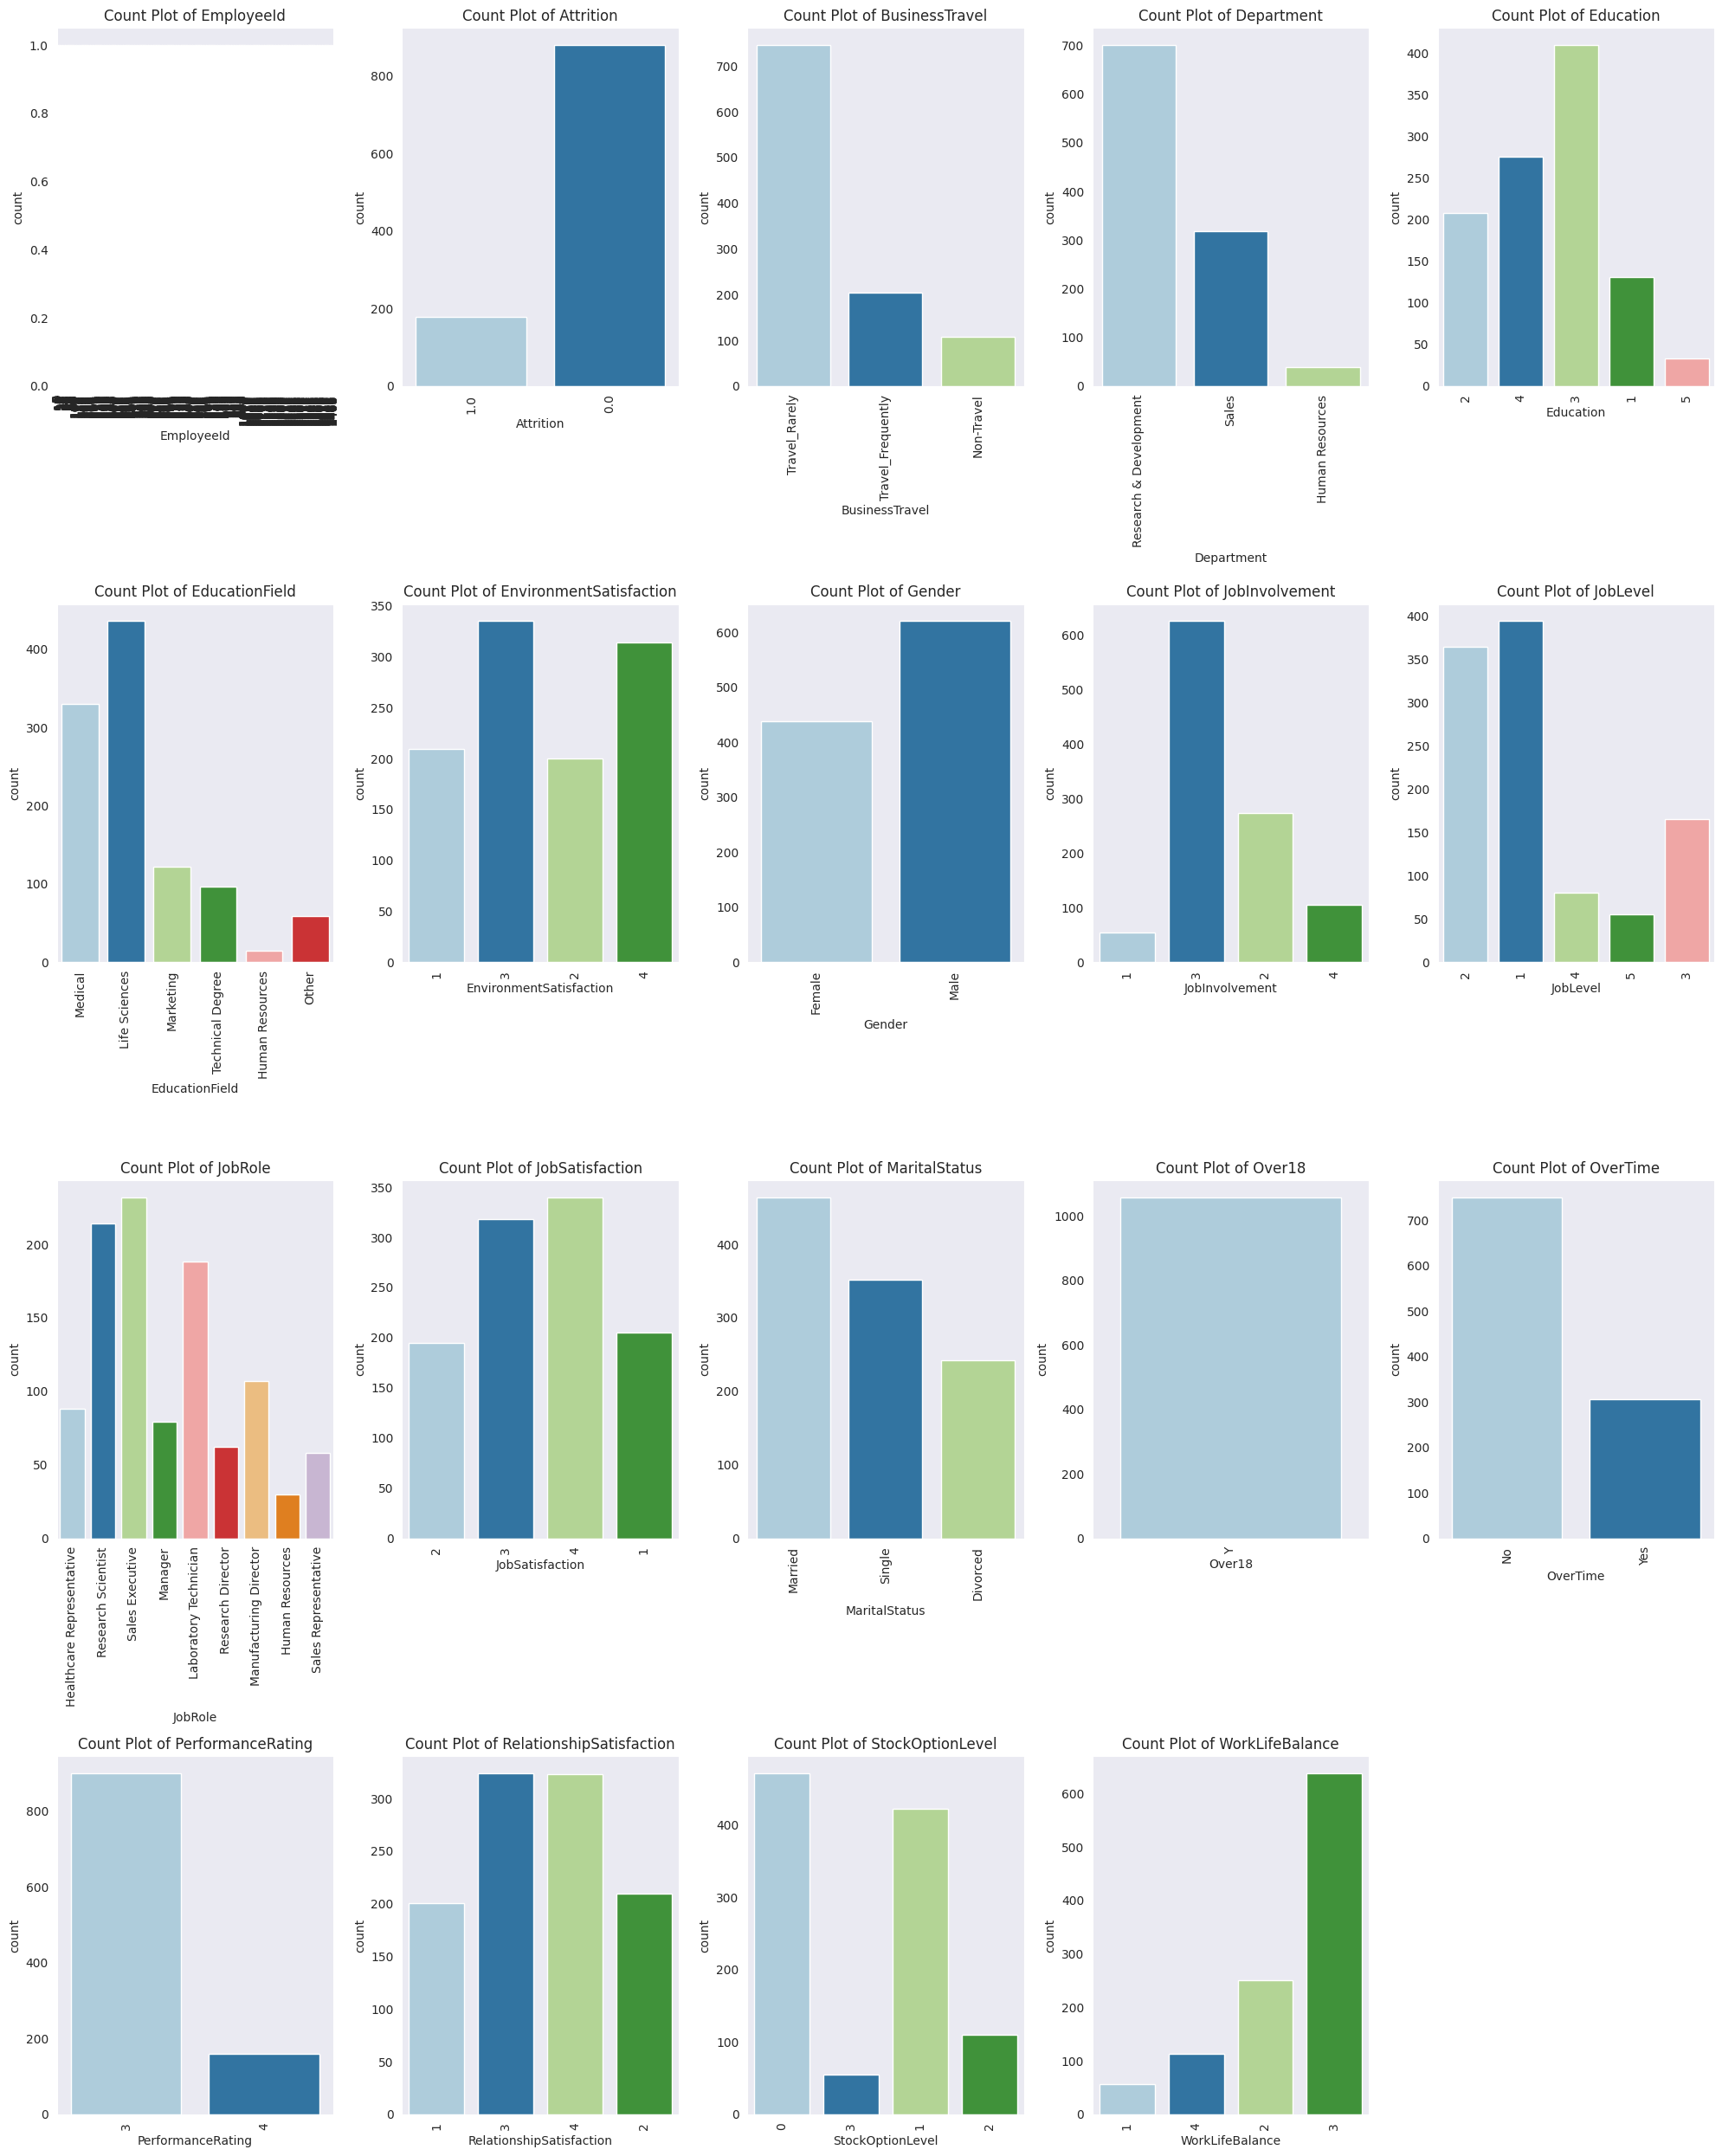

In [ ]:
sns.set_style("dark")

fig, axes = plt.subplots((len(obj_list) + 4) // 5, 5,
                         figsize=(20, 5 * 5))

axes = axes.flatten()

for i, column in enumerate(obj_list):
    sns.countplot(data=df, x=column, ax=axes[i], palette = 'Paired')
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the graph we can see:


*   Majority of employees are in the R&D department, while most employees job role are Research Scientist followed by Sales Executive.
*   Employees satisfaction (Job, Enviornment, and Relationship) mostly falls in cantegory 3 and 4.





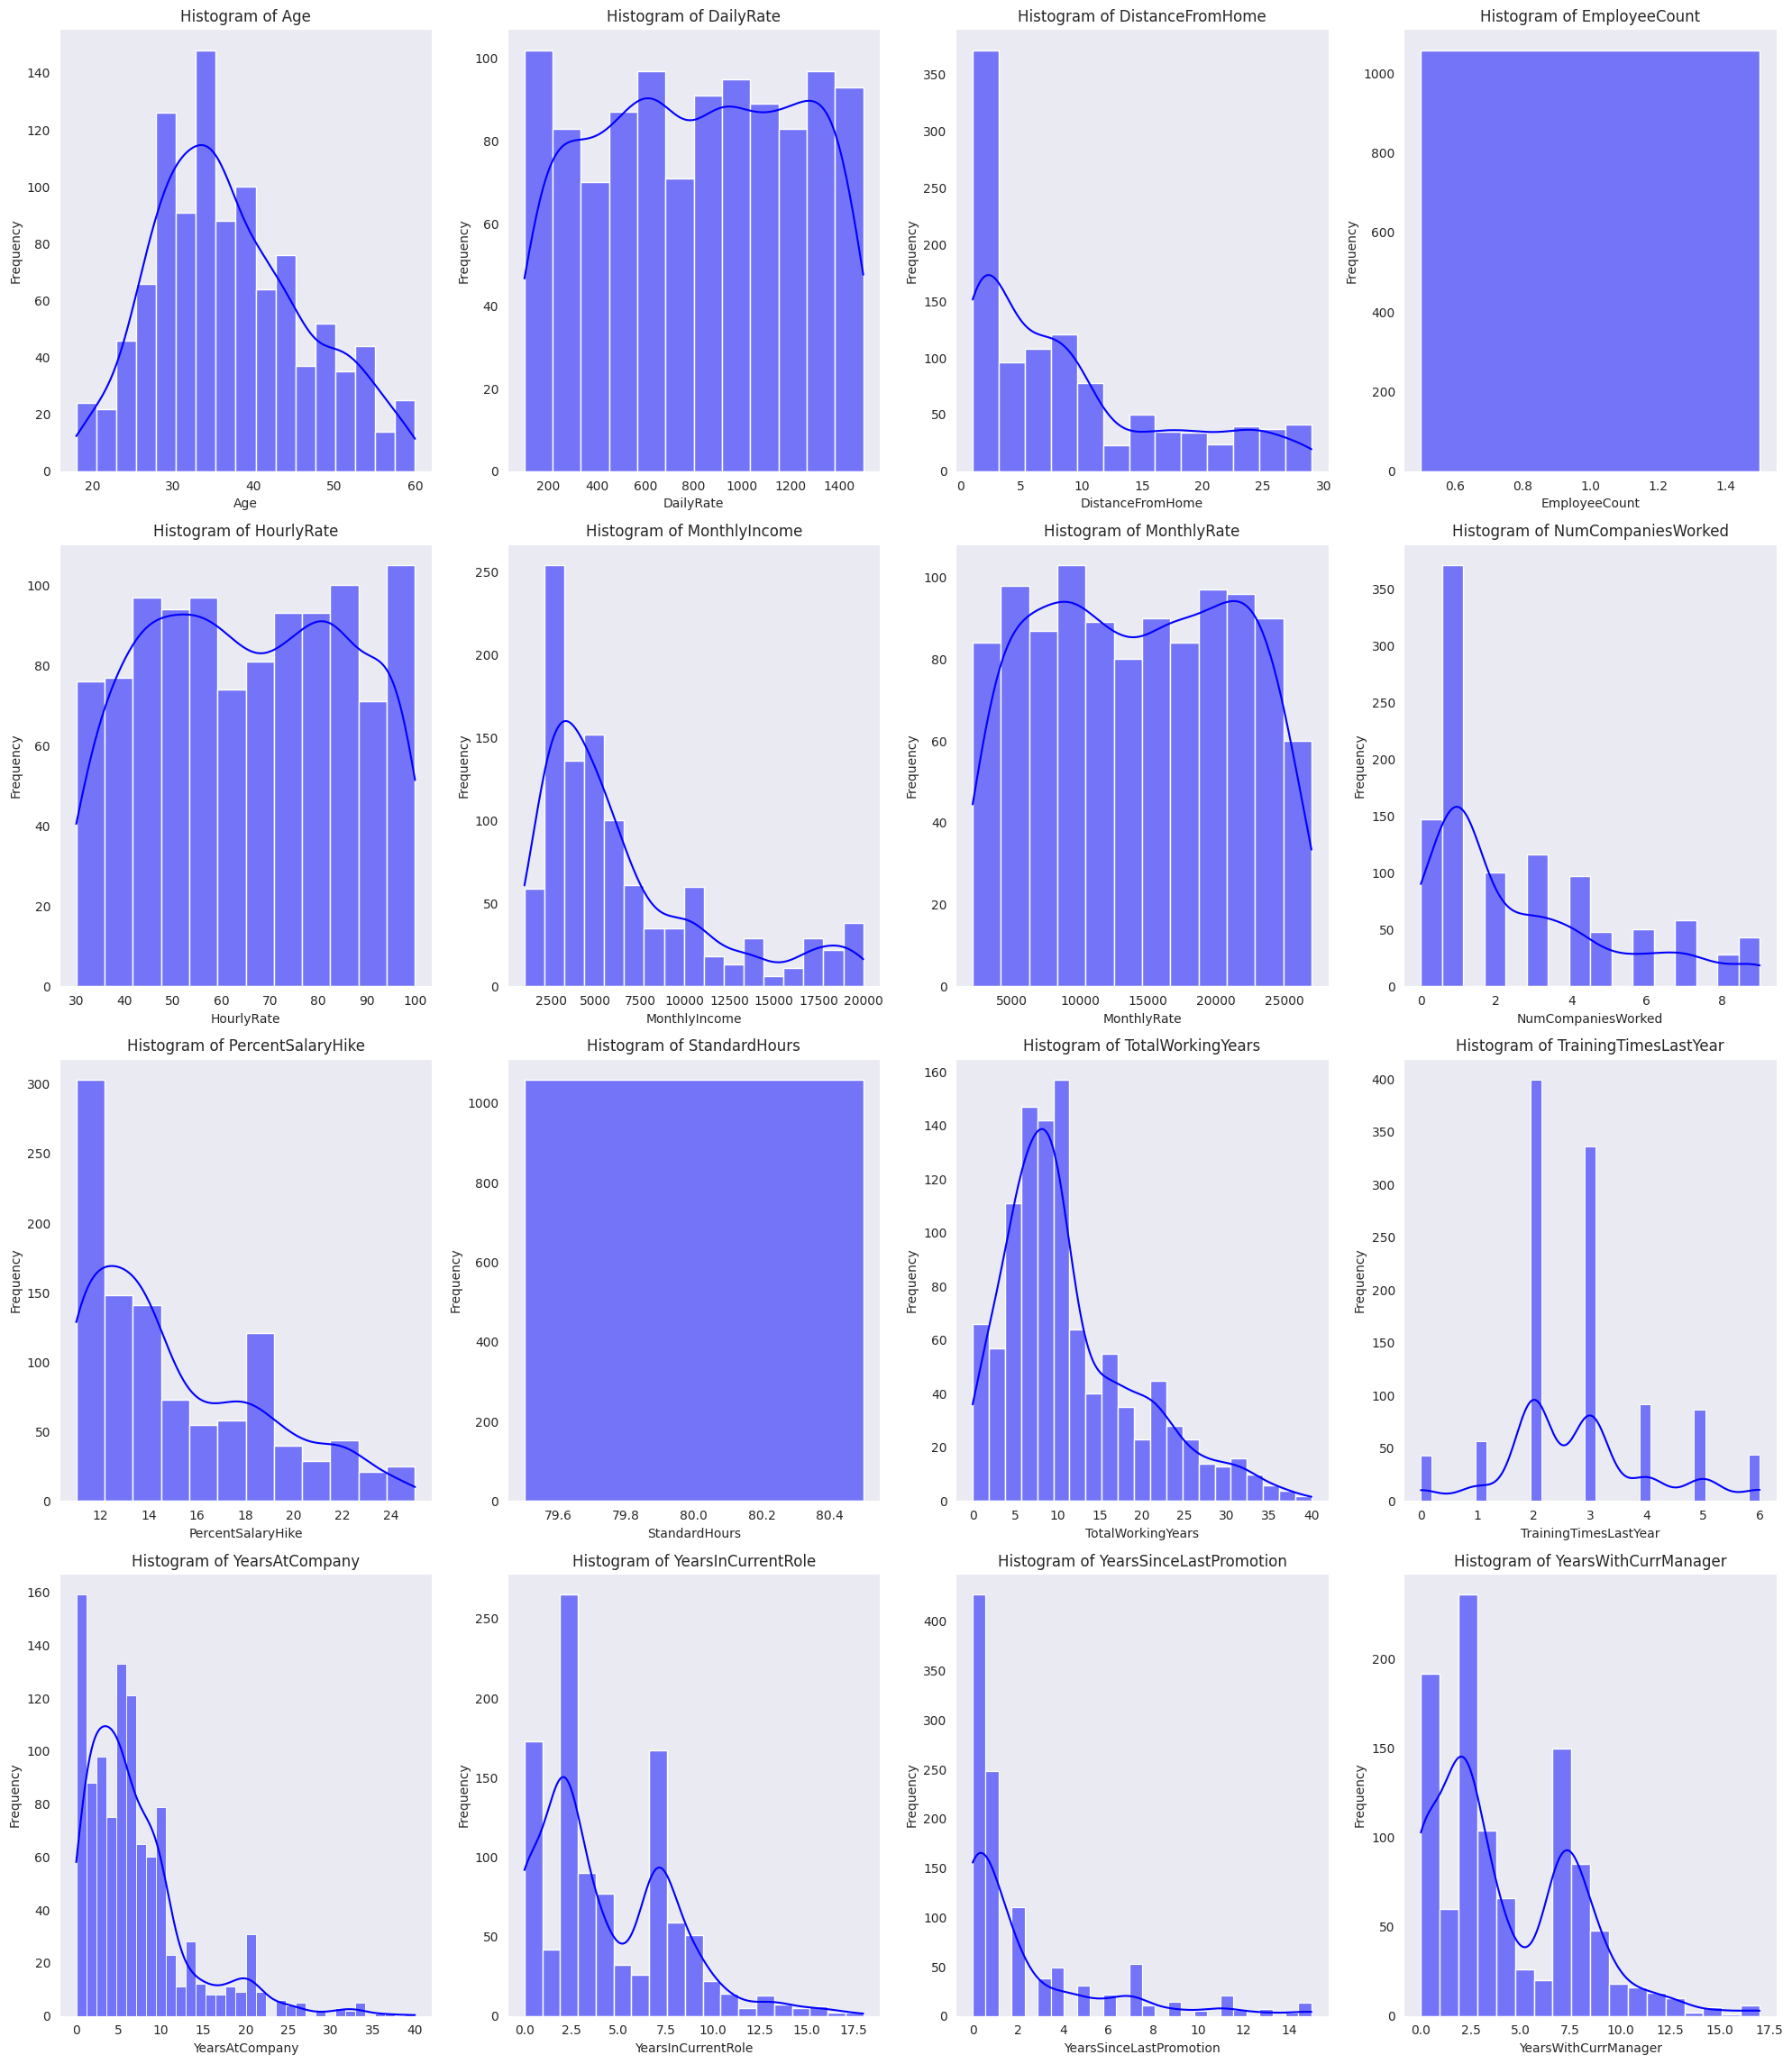

In [ ]:
sns.set_style("dark")

# Determine the number of rows and columns for subplots

num_rows = (len(int_list) + 3) // 4

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 5 * (len(int_list) + 3) // 4))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Iterate over each numerical column and create a histplot
for i, column in enumerate(int_list):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

From the above graph we can see an interesting pattern, which is the monthly rate and the monthly income differs quite significantly. All the rates (hourly, daily, and monthly) are all distributed quite evenly. In contrast, The monthly Income distribution is skewed.

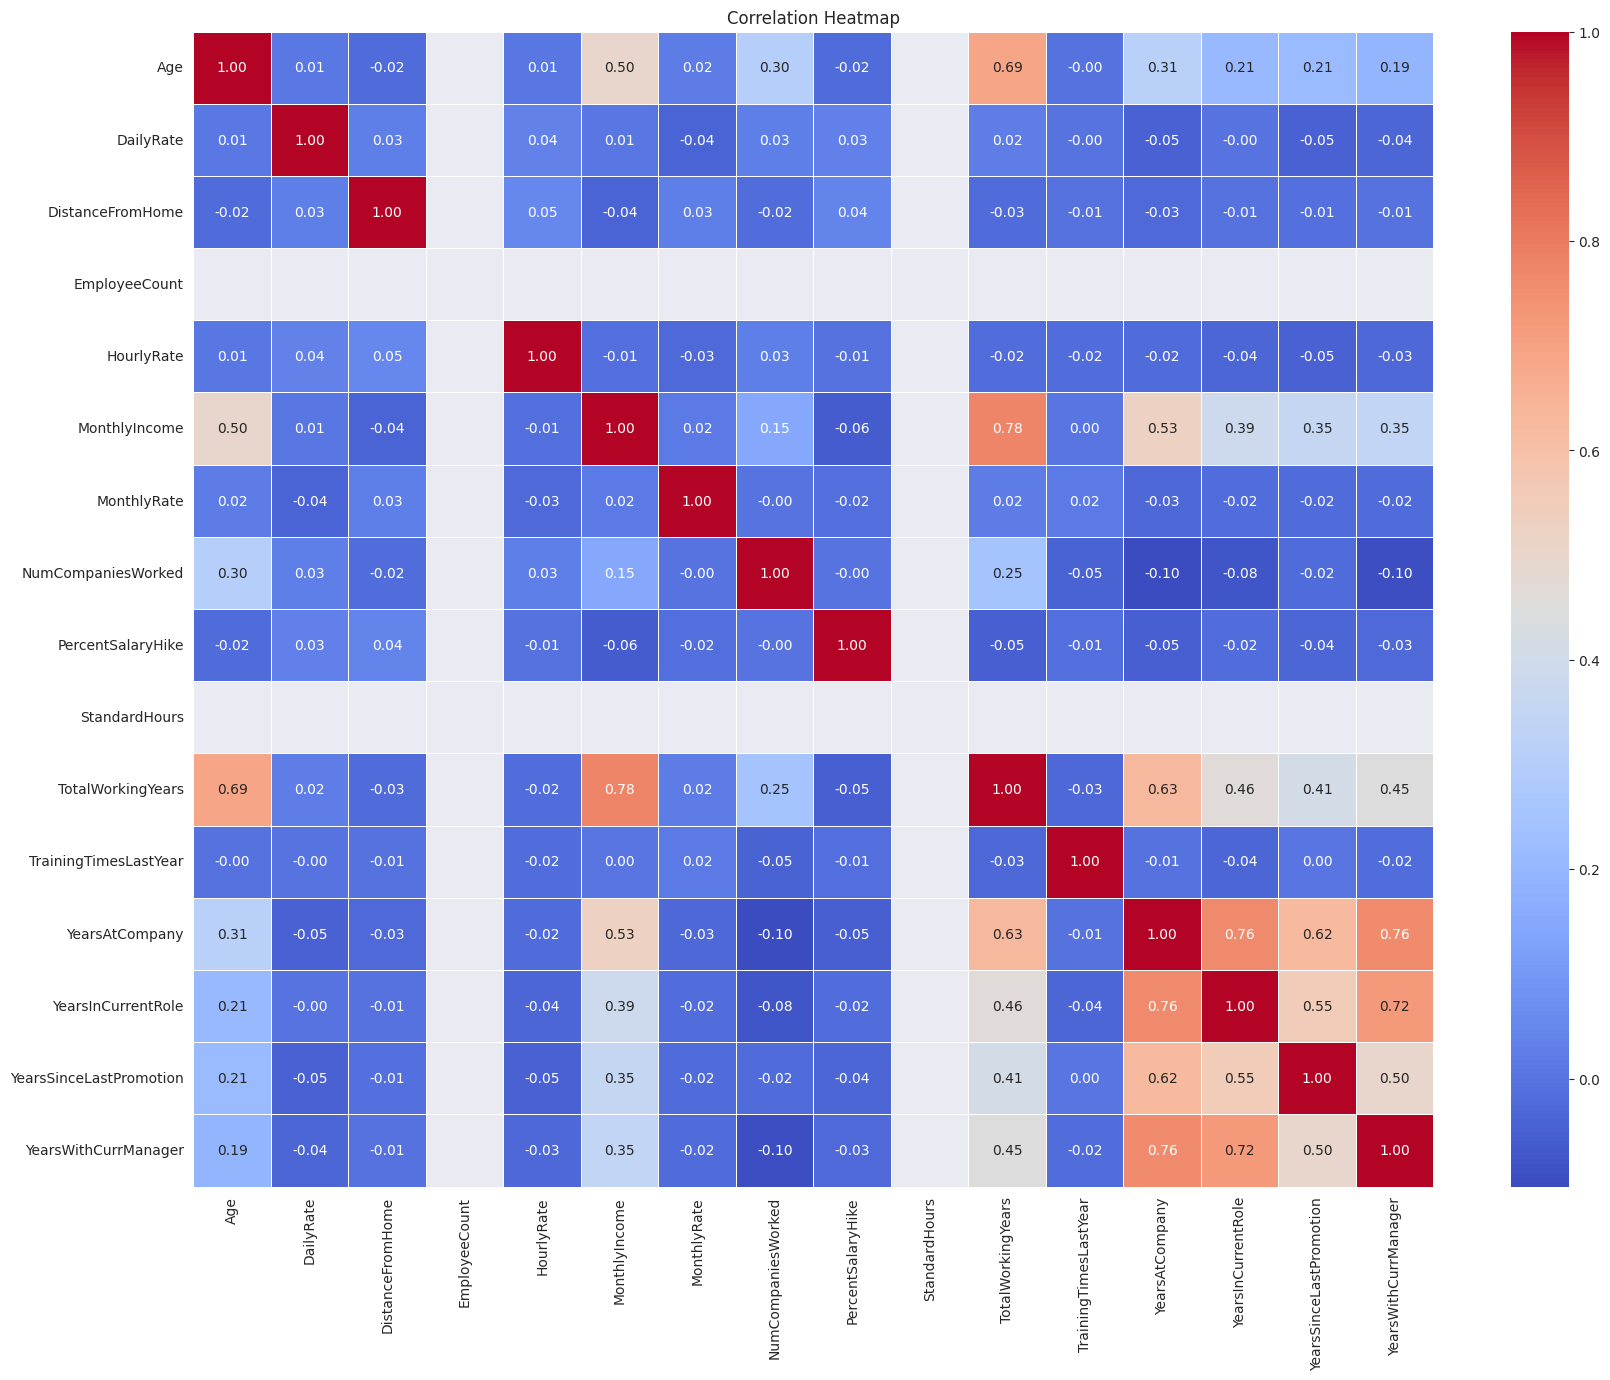

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

From the heatmap, we can see that some variables are correlated to each other. Some of the notable ones are Monthly Income correlated with Total Working Years, Age, and Years at the company.

## **Attrition Analysis**

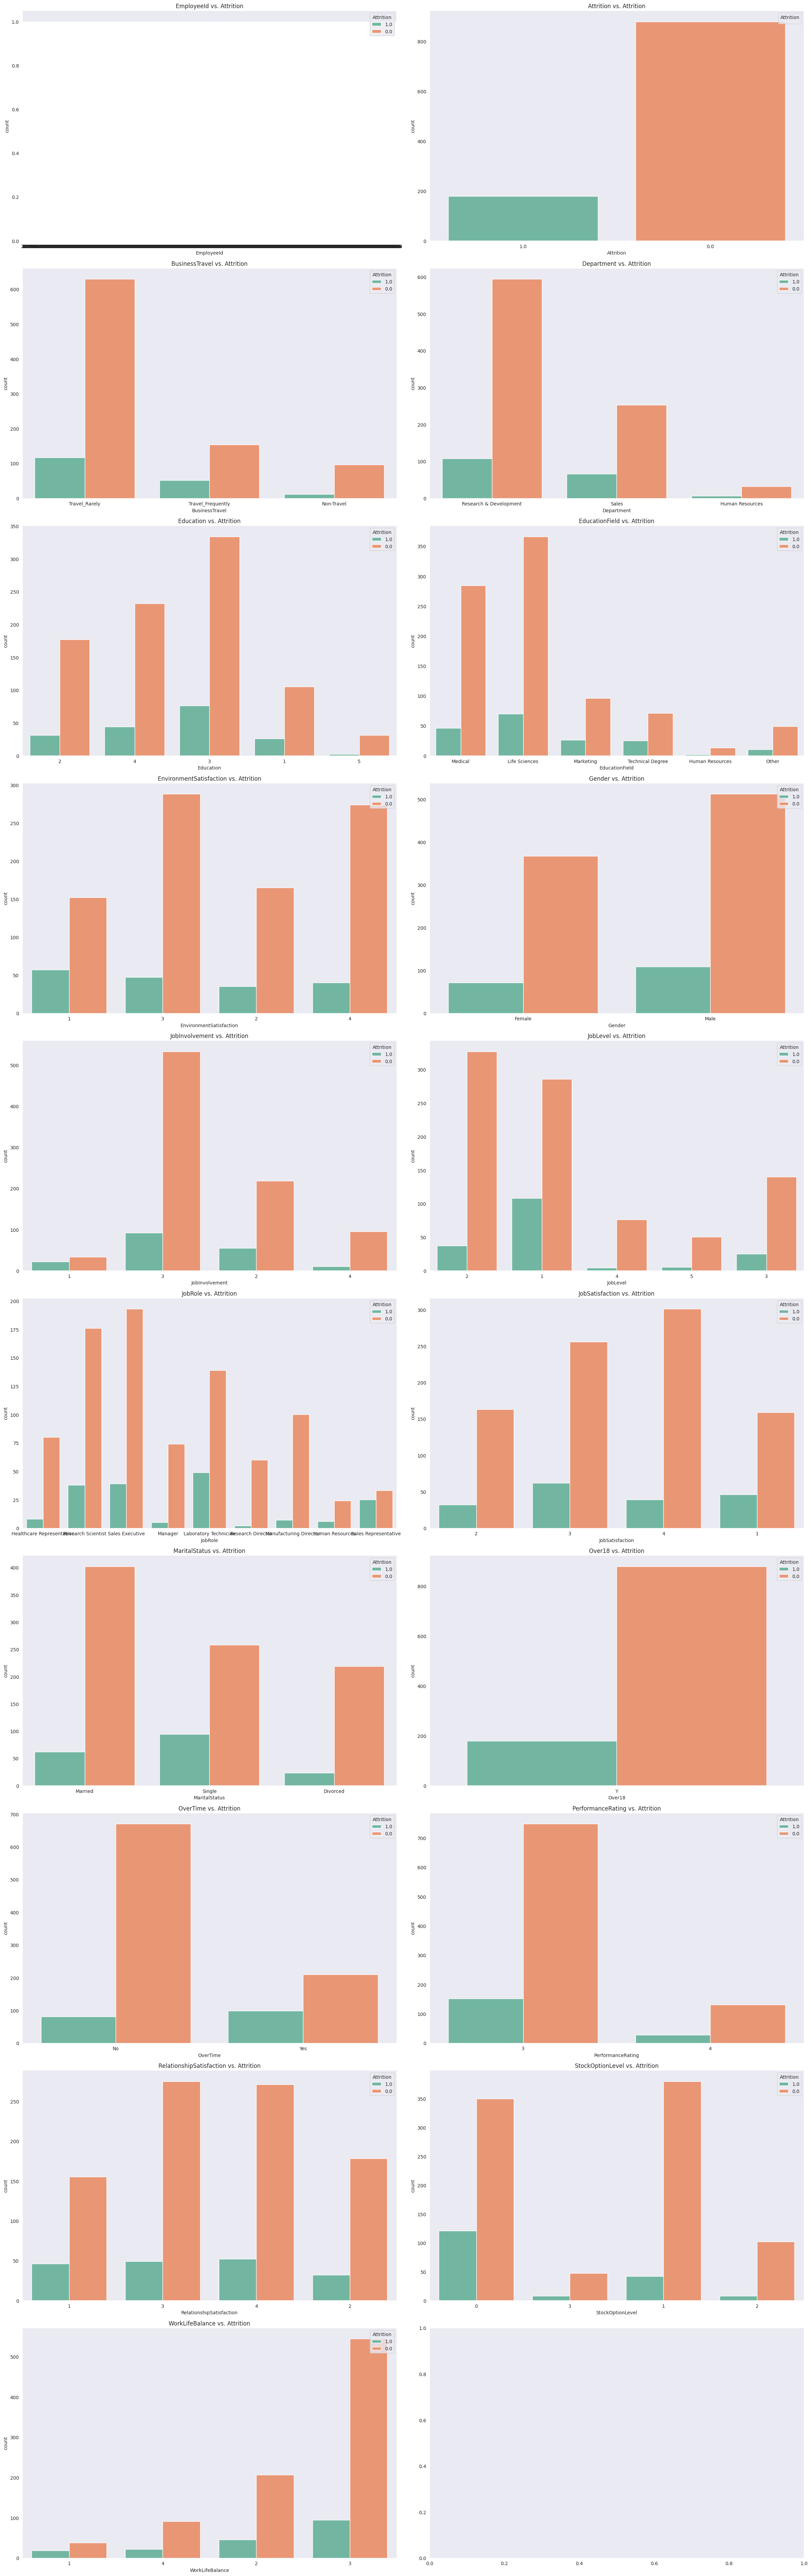

In [ ]:
# plotting each categorical variables with attrition
sns.set_style("dark")

fig, axes = plt.subplots(((len(obj_list) + 1)//2), 2, figsize=(24, 4 * len(obj_list)))

axes = axes.flatten()

for i, column in enumerate(obj_list):
    sns.countplot(data=df, x=column, hue='Attrition', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{column} vs. Attrition')
    axes[i].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()

The above graph shows how each categorical variables compared to attrition. For better comaprison for each variables, we should see their differences in terms of the percentages.

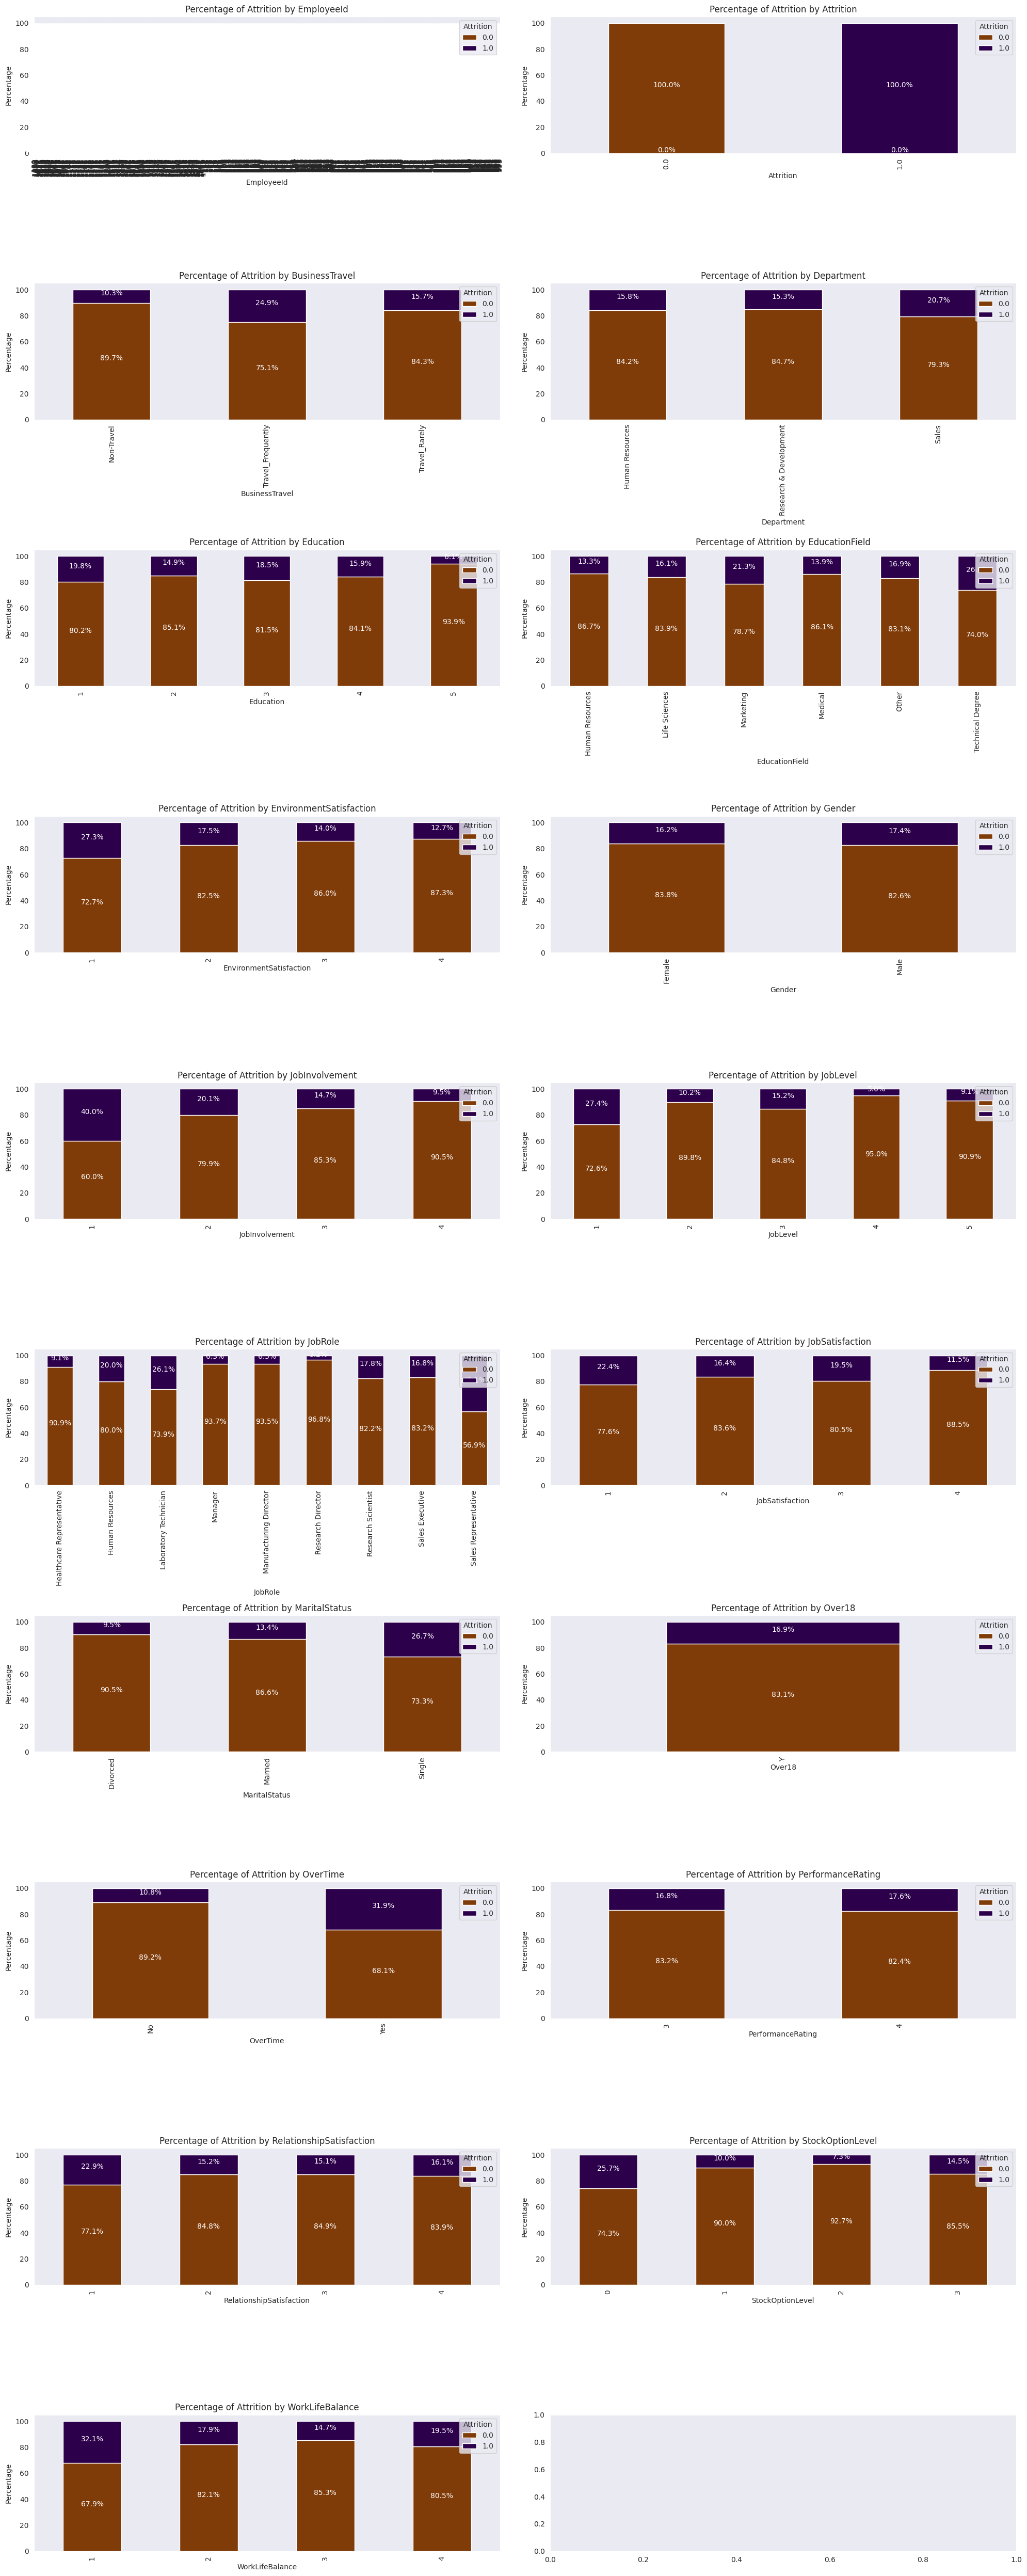

In [ ]:
fig, axes = plt.subplots(((len(obj_list) + 1)//2), 2, figsize=(20, 50))

axes = axes.flatten()

for i, column in enumerate(obj_list):
    # Calculate percentage per category per column
    counts = df.groupby([column, 'Attrition']).size().unstack().fillna(0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    percentages.plot(kind='bar', stacked=True, ax=axes[i], colormap= 'PuOr')
    axes[i].set_title(f'Percentage of Attrition by {column}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Attrition', loc='upper right')

    for container in axes[i].containers:
        axes[i].bar_label(container, label_type='center', fontsize=10, fmt='%.1f%%', padding=4 ,
                          color= 'white')

plt.tight_layout()
plt.show()

From the above graph, we can see that higher attrition is associated with **higher travel frequency and overtime**, **lower satisfactions, Job Involvment and Job Level, Stock Option Level, and Work life Balance.**

We can also see that certain Job Roles has higher attrition rate with the highest rate are the S**ales Representative with 43.1%** followed by **Laboratory Technician, and Human Resource with 26.1% and 20.0%** respectively.

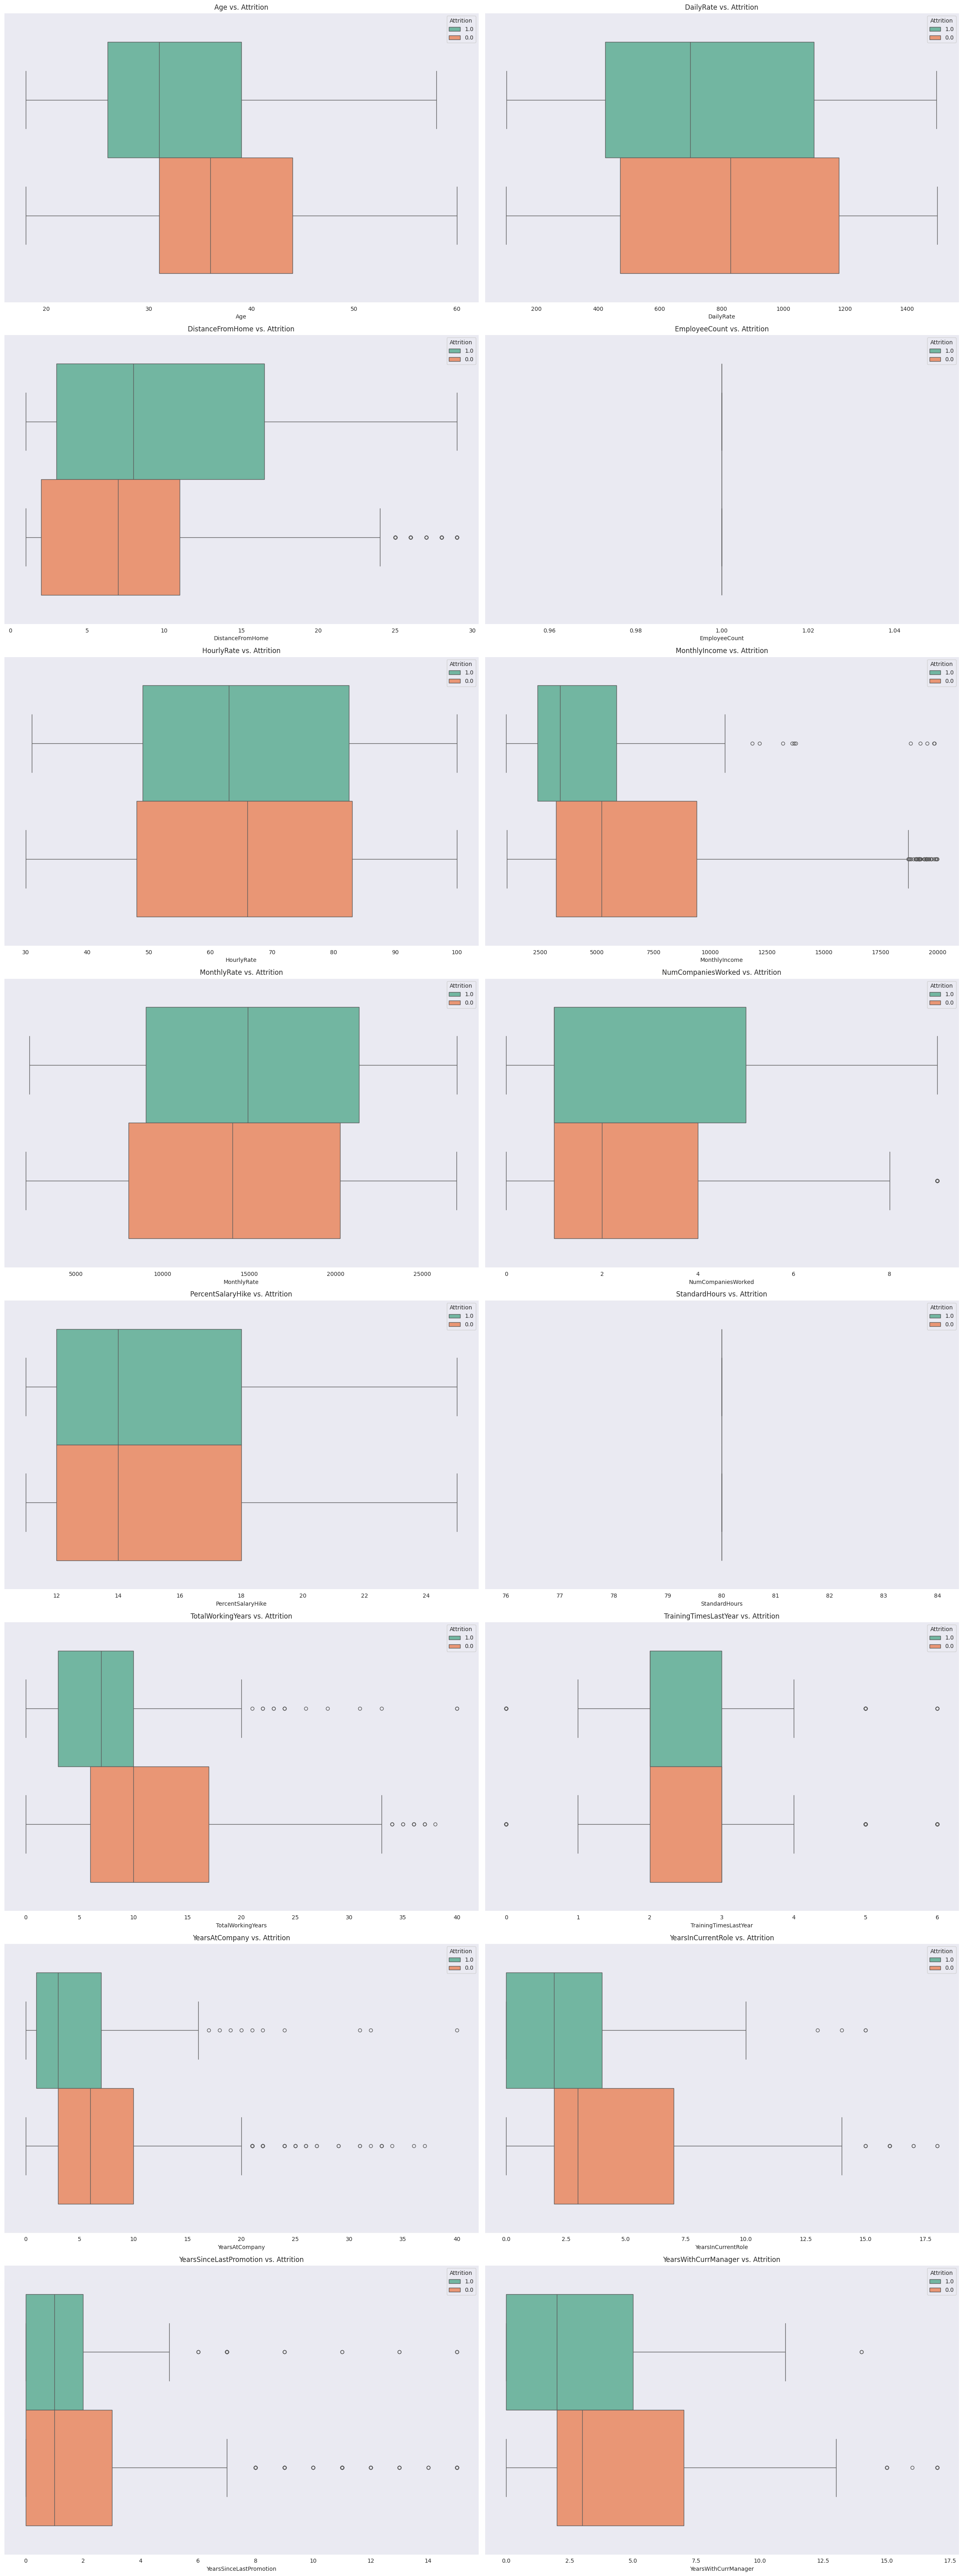

In [ ]:
# plotting numerical columns against attrition
sns.set_style("dark")

fig, axes = plt.subplots(((len(int_list) + 1)//2), 2, figsize=(24, 4 * len(int_list)))

axes = axes.flatten()

for i, column in enumerate(int_list):
    sns.boxplot(data=df, x=column, hue='Attrition', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{column} vs. Attrition')
    axes[i].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()

From the visualization, we can see that attrition is most likely caused by **lower Monthly Income, and higher Distance From Home**. The younger employees are also more likely to quit.

We can also see lower years working also leads to attrition, but we can argue that employees that are unhappy with the job, are more likely to quit, which resulting in lower total working years as compared to those who are happy. This also applies for other years related variables (Years with manager, etc.)

In [ ]:
int_list.append('JobRole')

pivot_df = df[int_list]

int_list.remove('JobRole')

pivot_df

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRole
1,37,1141,11,1,61,4777,14382,5,15,80,15,2,1,0,0,0,Healthcare Representative
2,51,1323,4,1,34,2461,10332,9,12,80,18,2,10,0,2,7,Research Scientist
3,42,555,26,1,77,13525,14864,5,14,80,23,2,20,4,4,8,Sales Executive
6,40,1124,1,1,57,7457,13273,2,22,80,6,2,4,3,0,2,Sales Executive
7,55,725,2,1,78,19859,21199,5,13,80,24,2,5,2,1,4,Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1366,24,1,72,8722,12355,1,12,80,10,2,10,7,1,9,Healthcare Representative
1465,38,168,1,1,81,7861,15397,4,14,80,10,4,1,0,0,0,Manufacturing Director
1467,28,1485,12,1,79,2515,22955,1,11,80,1,4,1,1,0,0,Laboratory Technician
1468,40,458,16,1,74,3544,8532,9,16,80,6,0,4,2,0,0,Research Scientist


In [ ]:
pivot1 = pd.pivot_table(pivot_df, index = 'JobRole')
pivot1

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,
Healthcare Representative,39.965909,883.079545,9.954545,1,68.295455,7769.727273,13817.704545,2.931818,15.181818,80,14.750000,2.579545,8.636364,4.897727,3.079545,4.454545
Human Resources,36.800000,802.333333,8.033333,1,61.900000,4573.300000,14924.266667,3.533333,15.033333,80,8.900000,2.500000,5.633333,3.900000,1.400000,3.333333
Laboratory Technician,34.079787,805.622340,9.170213,1,65.510638,3240.632979,13652.074468,2.606383,15.186170,80,7.734043,2.904255,5.021277,3.063830,1.457447,3.356383
Manager,46.658228,826.341772,7.468354,1,66.227848,17139.582278,14694.101266,2.962025,14.759494,80,24.341772,2.898734,15.088608,6.721519,5.253165,6.341772
Manufacturing Director,38.411215,823.186916,9.130841,1,63.485981,7438.000000,14940.345794,2.775701,15.364486,80,13.074766,2.672897,7.588785,5.205607,2.065421,5.018692
Research Director,43.629032,797.064516,7.387097,1,63.903226,16115.774194,15186.838710,3.790323,14.693548,80,21.354839,2.822581,10.338710,6.225806,2.709677,5.741935
Research Scientist,34.331776,805.051402,9.252336,1,67.317757,3152.677570,13991.710280,2.359813,15.485981,80,7.495327,2.672897,4.901869,3.186916,1.467290,3.065421
Sales Executive,36.909483,780.961207,9.267241,1,64.922414,6917.797414,14409.215517,2.732759,14.943966,80,11.193966,2.784483,7.568966,4.844828,2.482759,4.836207
Sales Representative,30.448276,810.586207,8.672414,1,65.741379,2610.396552,14246.706897,1.810345,15.362069,80,4.017241,3.000000,2.620690,1.793103,0.862069,1.517241


In [ ]:
modified_df = df

satisfaction = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']

for i in satisfaction:
  modified_df[i] = modified_df[i].astype(int)

modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   object
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   object
 14  JobLevel                  105

In [ ]:
modified_df['AverageSatisfaction'] = (modified_df['EnvironmentSatisfaction'] + modified_df['JobSatisfaction'] + modified_df['EnvironmentSatisfaction'])/3

modified_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverallSatisfaction,AverageSatisfaction
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,0,15,2,1,1,0,0,0,2,1.333333
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,18,2,4,10,0,2,7,3,1.666667
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,1,23,2,4,20,4,4,8,18,2.666667
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,6,2,2,4,3,0,2,16,2.666667
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,1,24,2,3,5,2,1,4,16,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,0,10,2,2,10,7,1,9,4,1.666667
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,0,10,4,4,1,0,0,0,27,3.000000
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,0,1,4,2,1,1,0,0,36,3.333333
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,1,6,0,3,4,2,0,0,27,3.000000


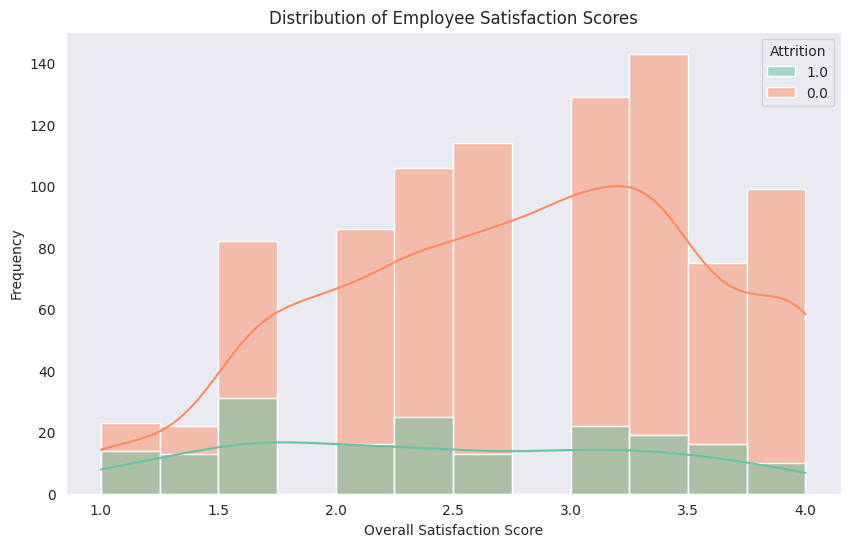

In [ ]:
# Plotting the histogram of Satisfaction
plt.figure(figsize=(10, 6))
sns.histplot(data = modified_df, x  = 'AverageSatisfaction', kde=True, hue = 'Attrition')

plt.xlabel('Overall Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Satisfaction Scores')
plt.show()

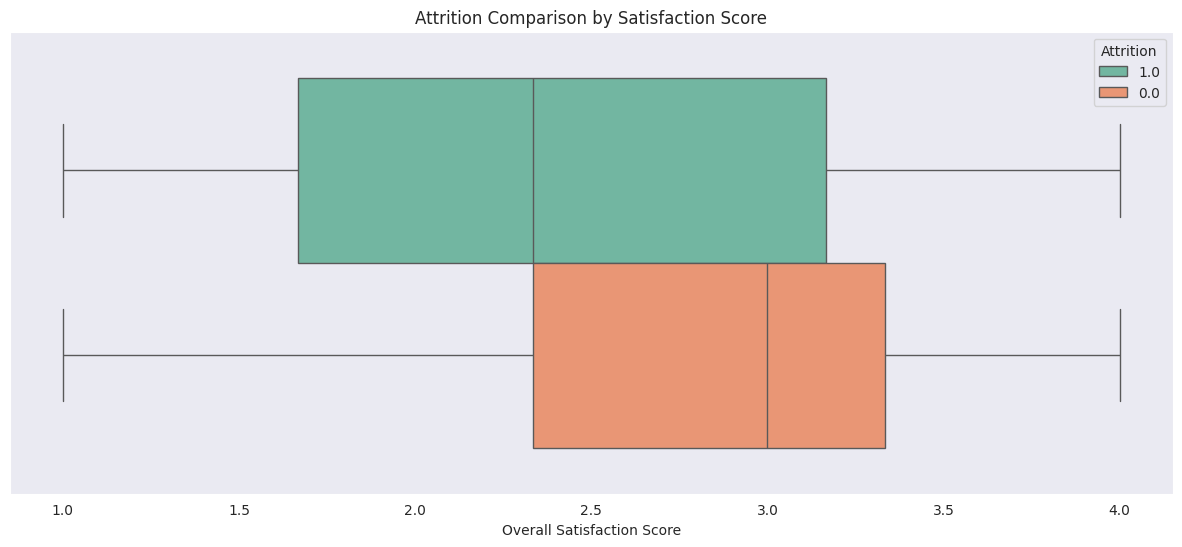

In [ ]:
plt.figure(figsize=(15, 6))
sns.set_palette("Set2")
sns.boxplot(data = modified_df, x= 'AverageSatisfaction', hue = 'Attrition')

plt.xlabel('Overall Satisfaction Score')
plt.title('Attrition Comparison by Satisfaction Score')
plt.show()

We can see that most employees have a quite good satisfaction with 3.0 average but those who quit have much lower satisfaction with an average of 2.3

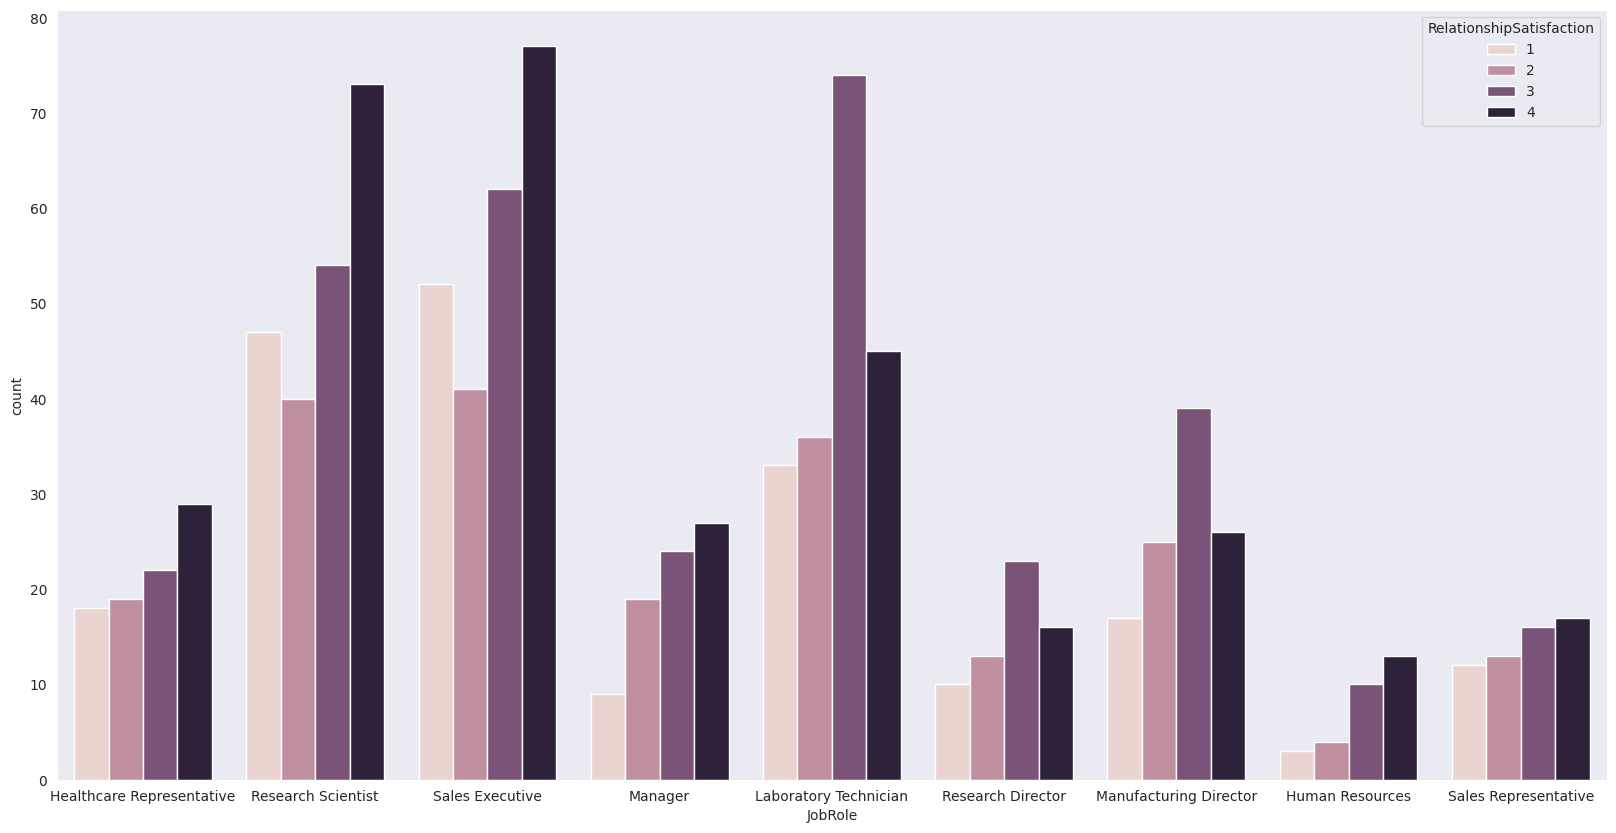

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(data = df, hue= 'RelationshipSatisfaction', x = 'JobRole')

plt.show()

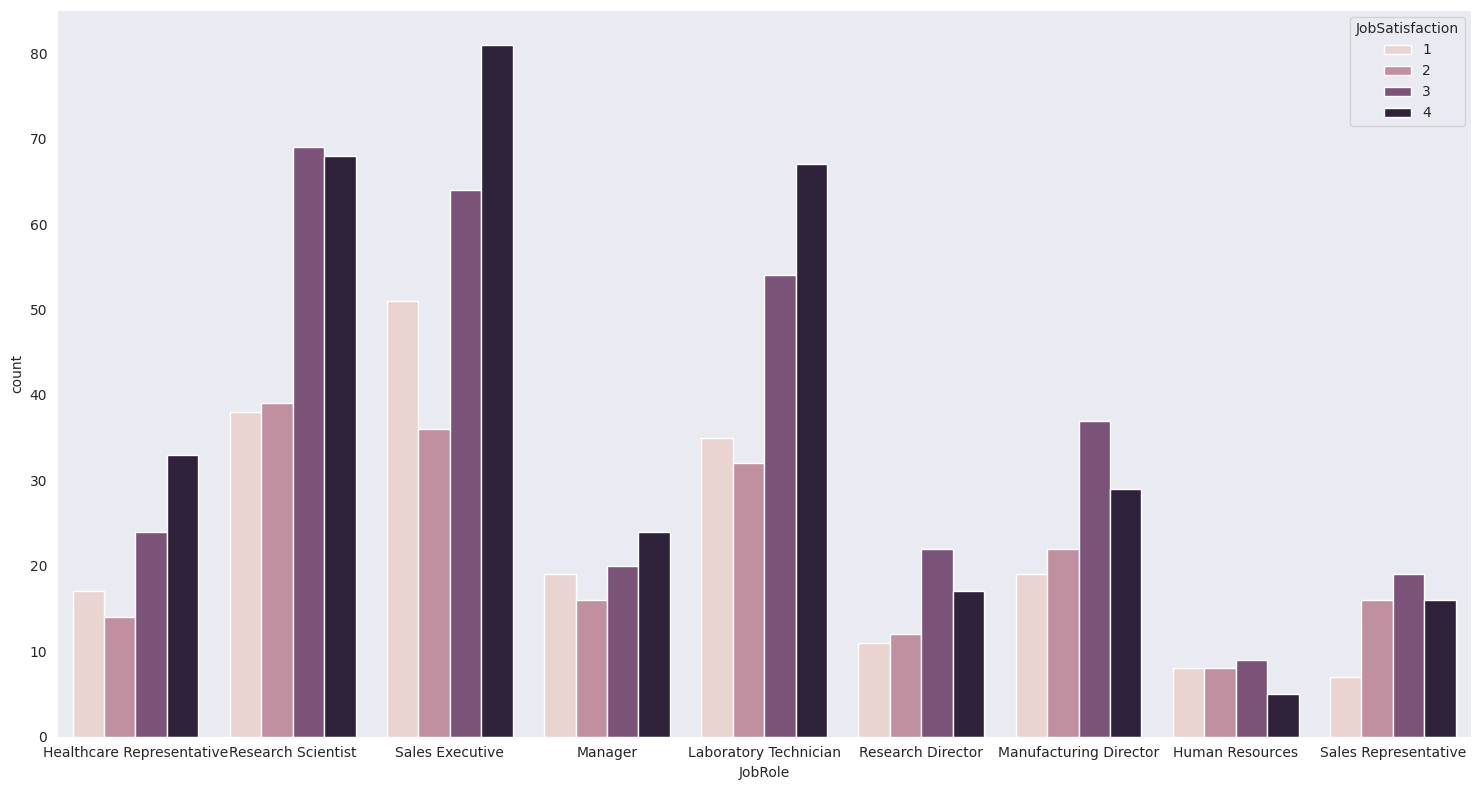

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'JobSatisfaction')

plt.tight_layout()
plt.show()

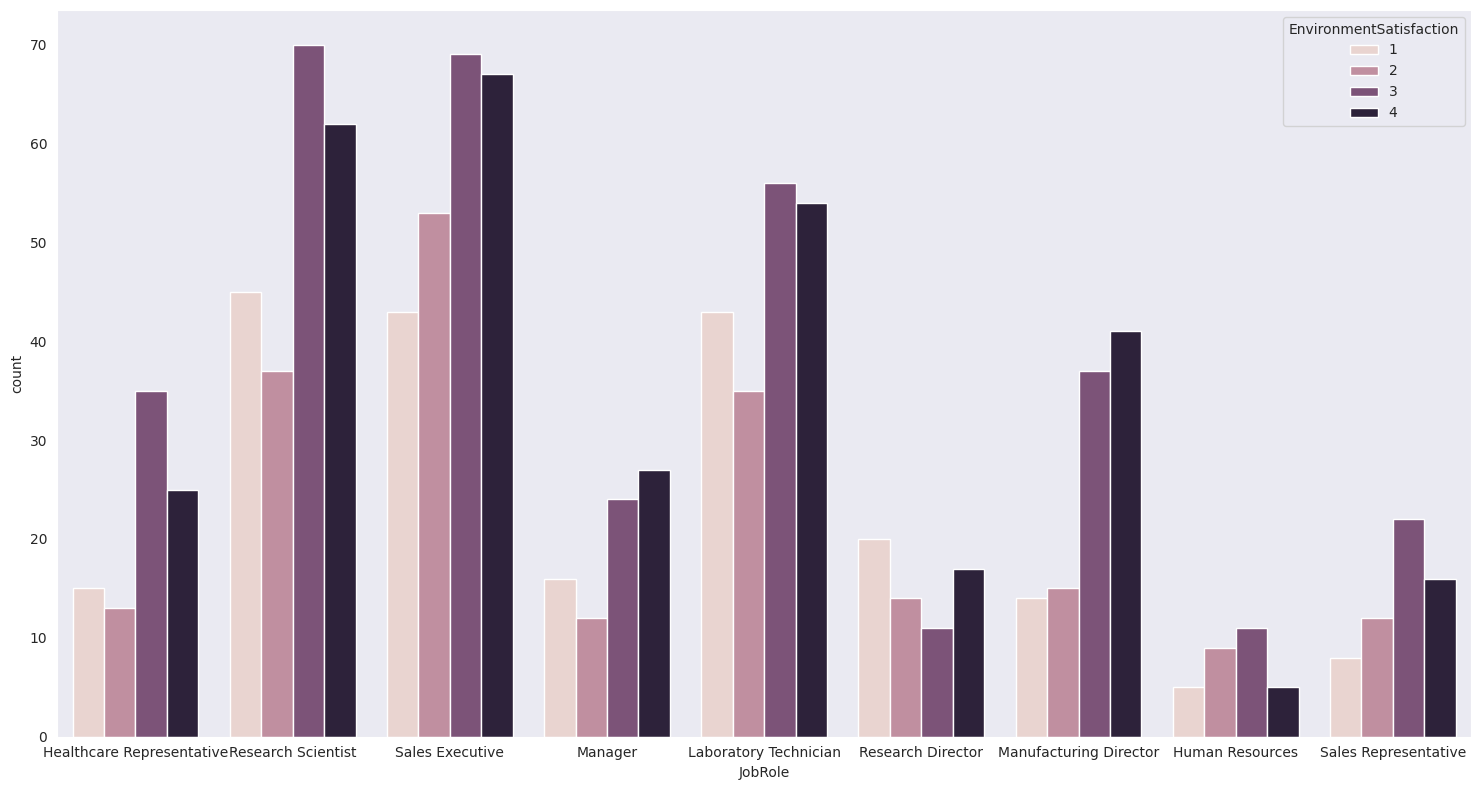

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'EnvironmentSatisfaction')

plt.tight_layout()
plt.show()

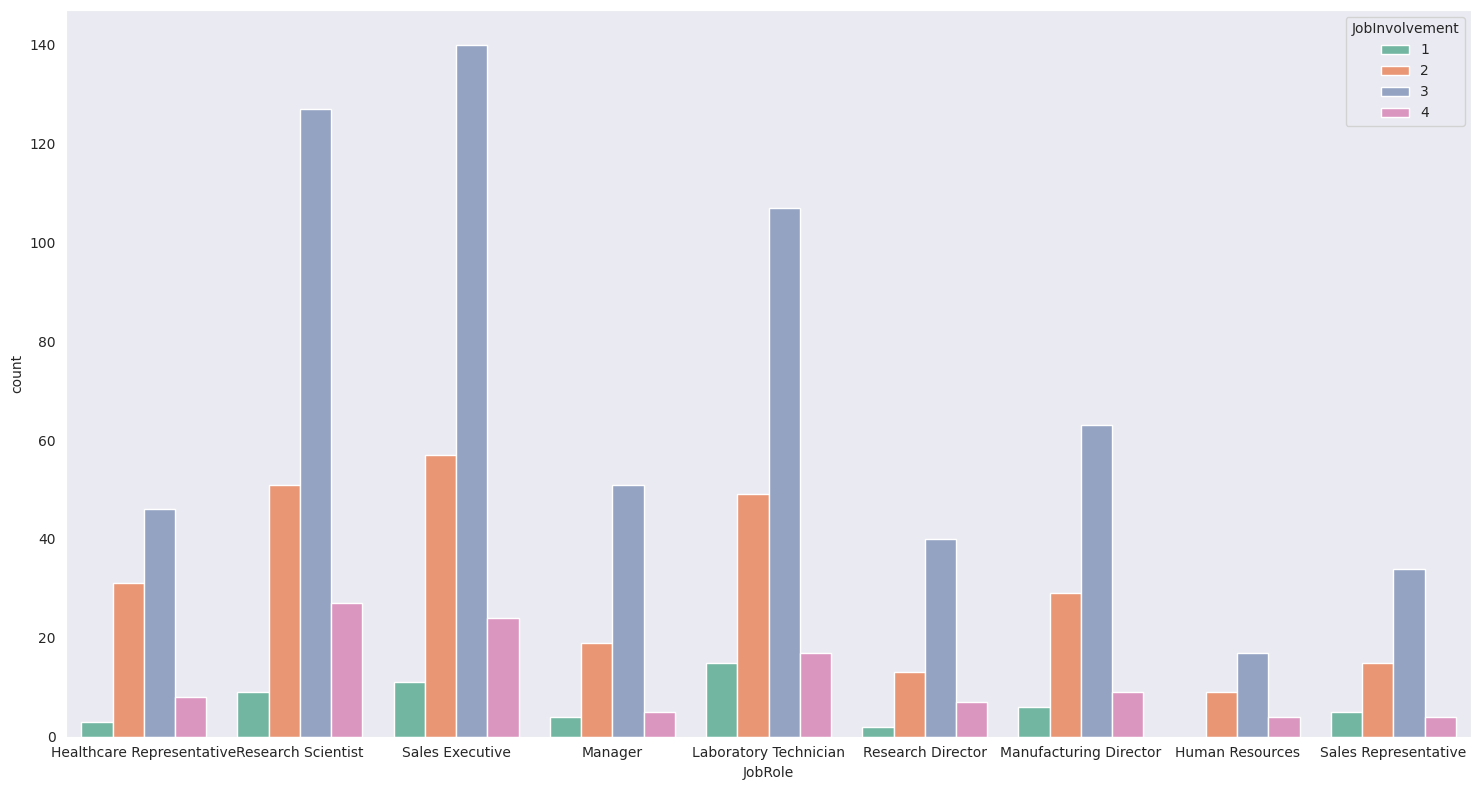

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'JobInvolvement',
              hue_order = ['1','2','3','4'])

plt.tight_layout()
plt.show()

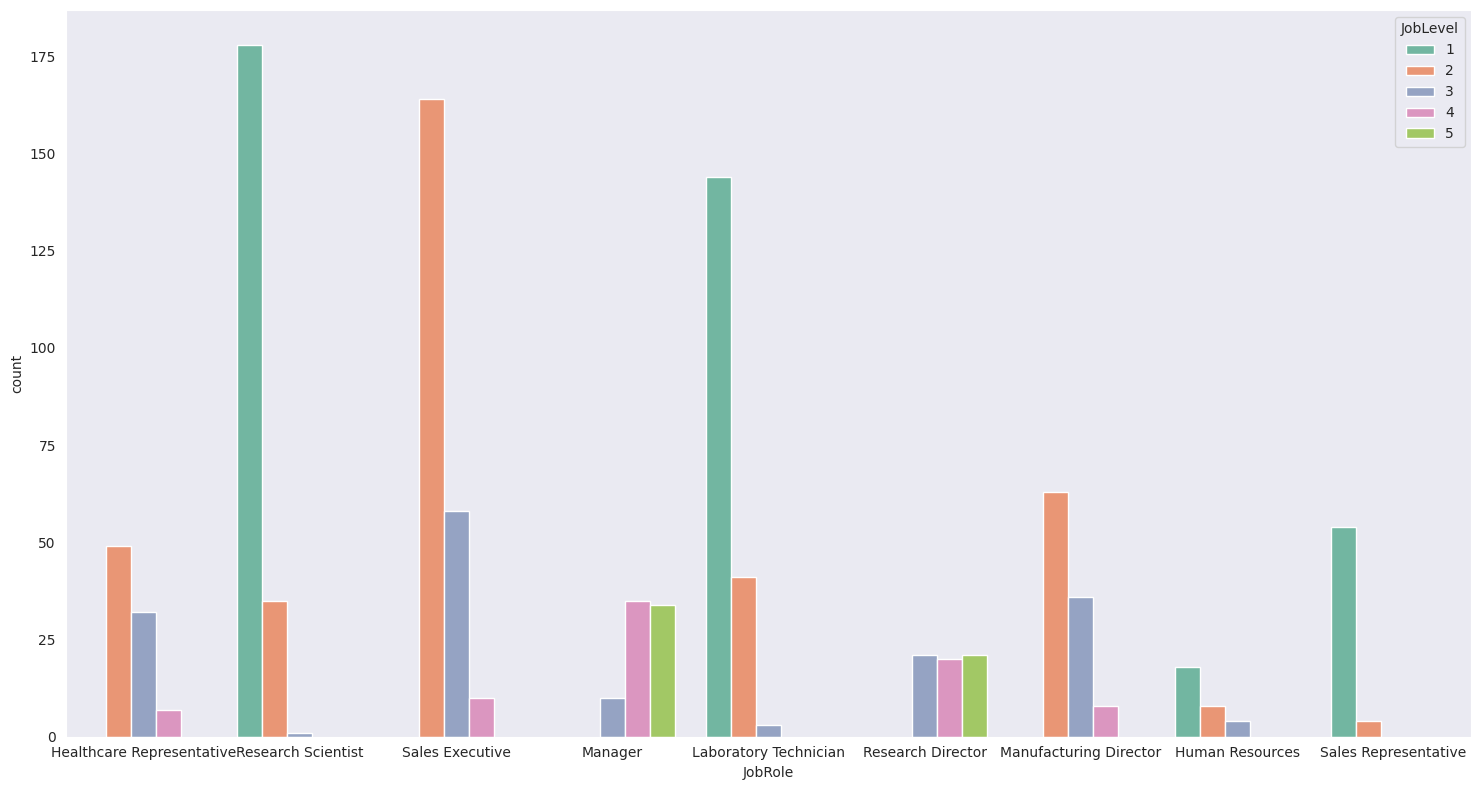

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'JobLevel',
              hue_order = ['1','2','3','4','5'])

plt.tight_layout()
plt.show()

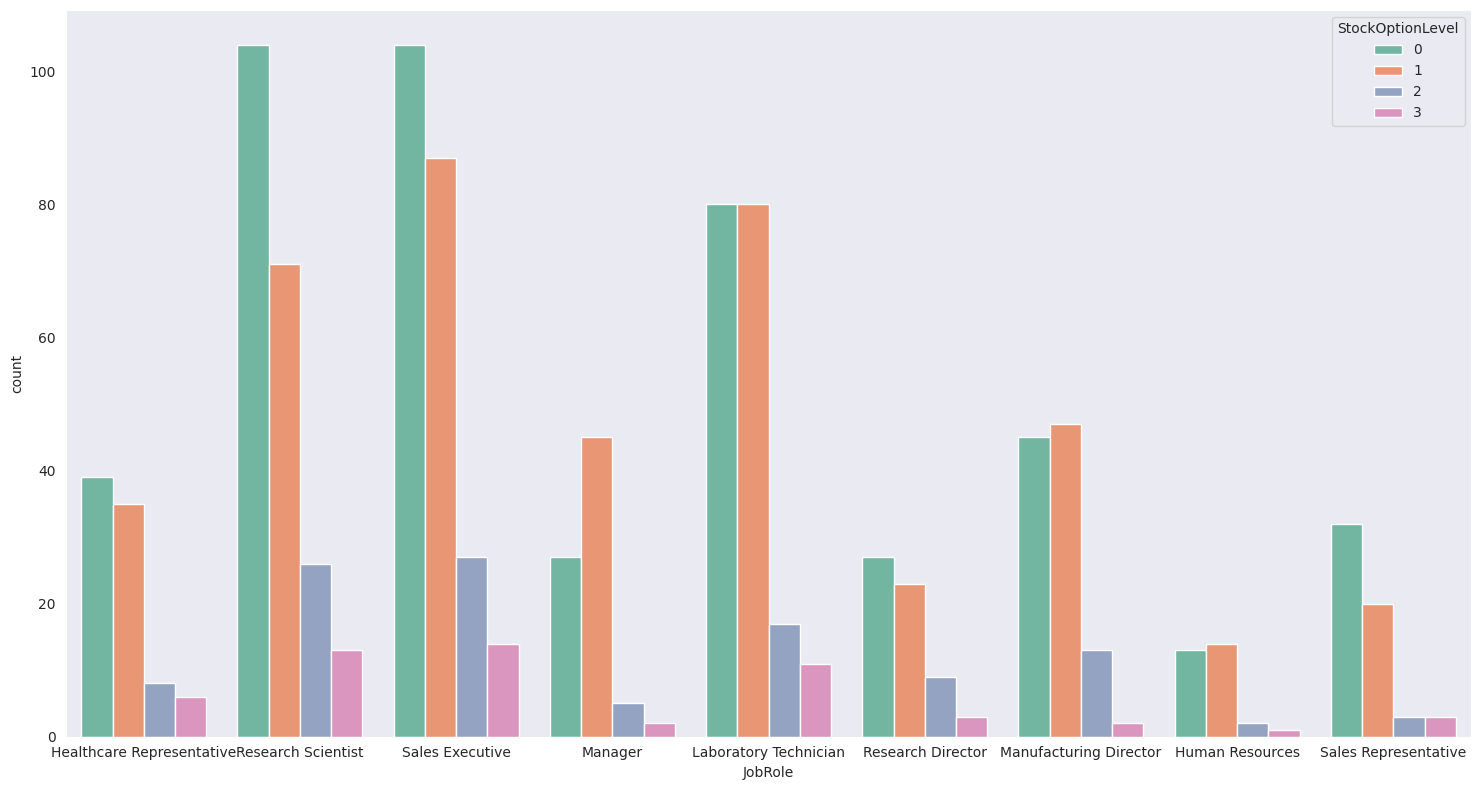

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'StockOptionLevel',
              hue_order = ['0','1','2','3'])

plt.tight_layout()
plt.show()

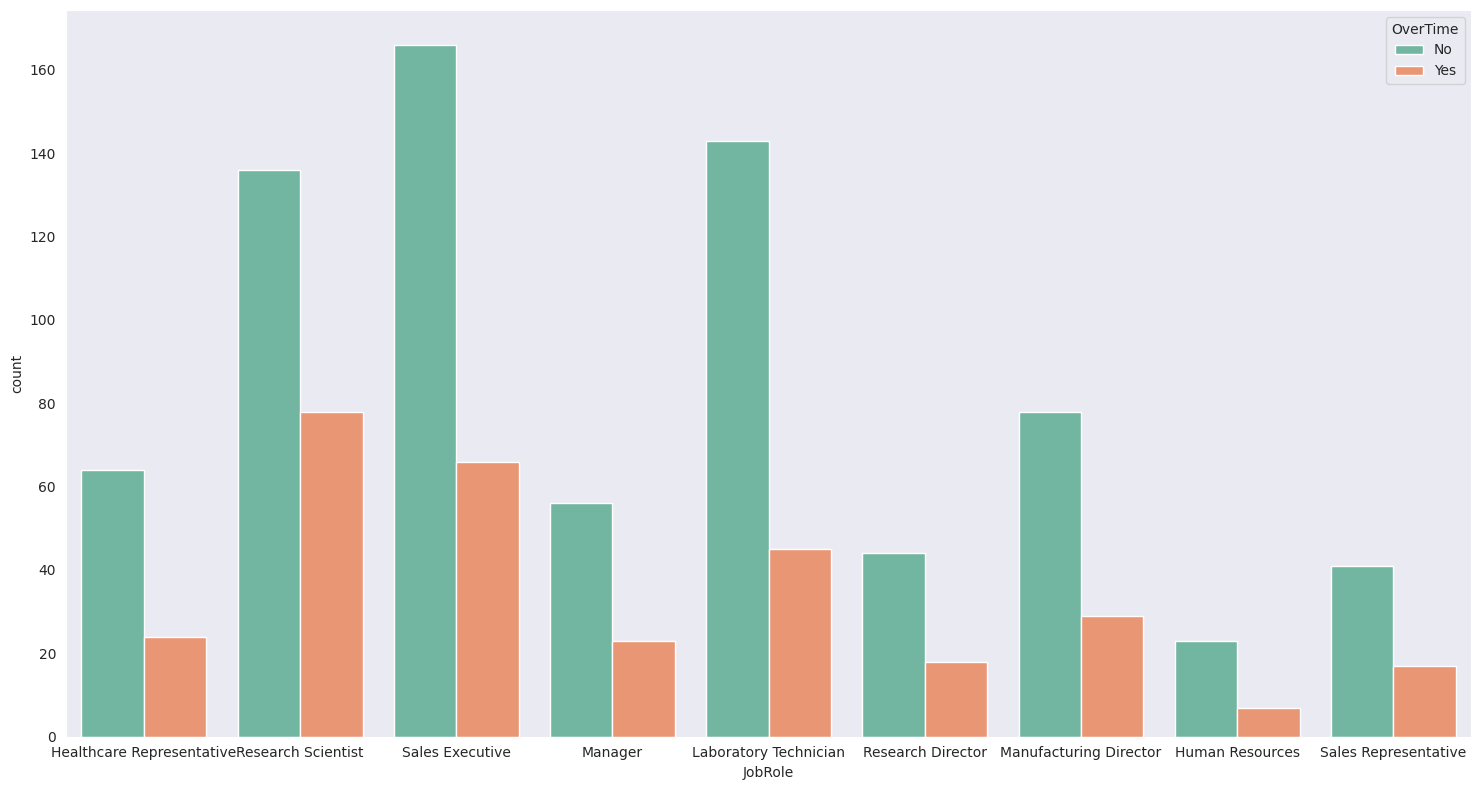

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'OverTime')

plt.tight_layout()
plt.show()

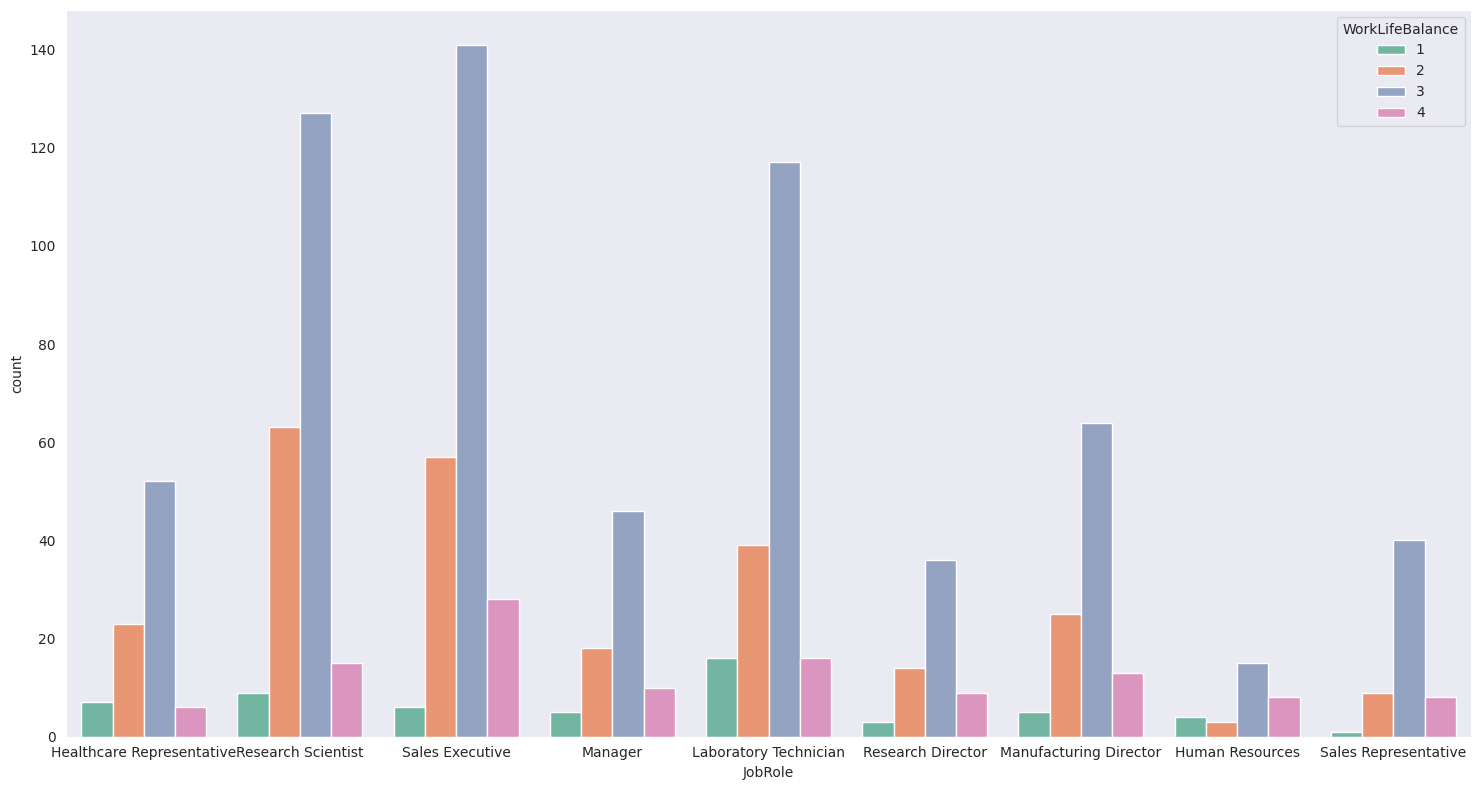

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'WorkLifeBalance',
              hue_order= ['1','2','3','4'])

plt.tight_layout()
plt.show()

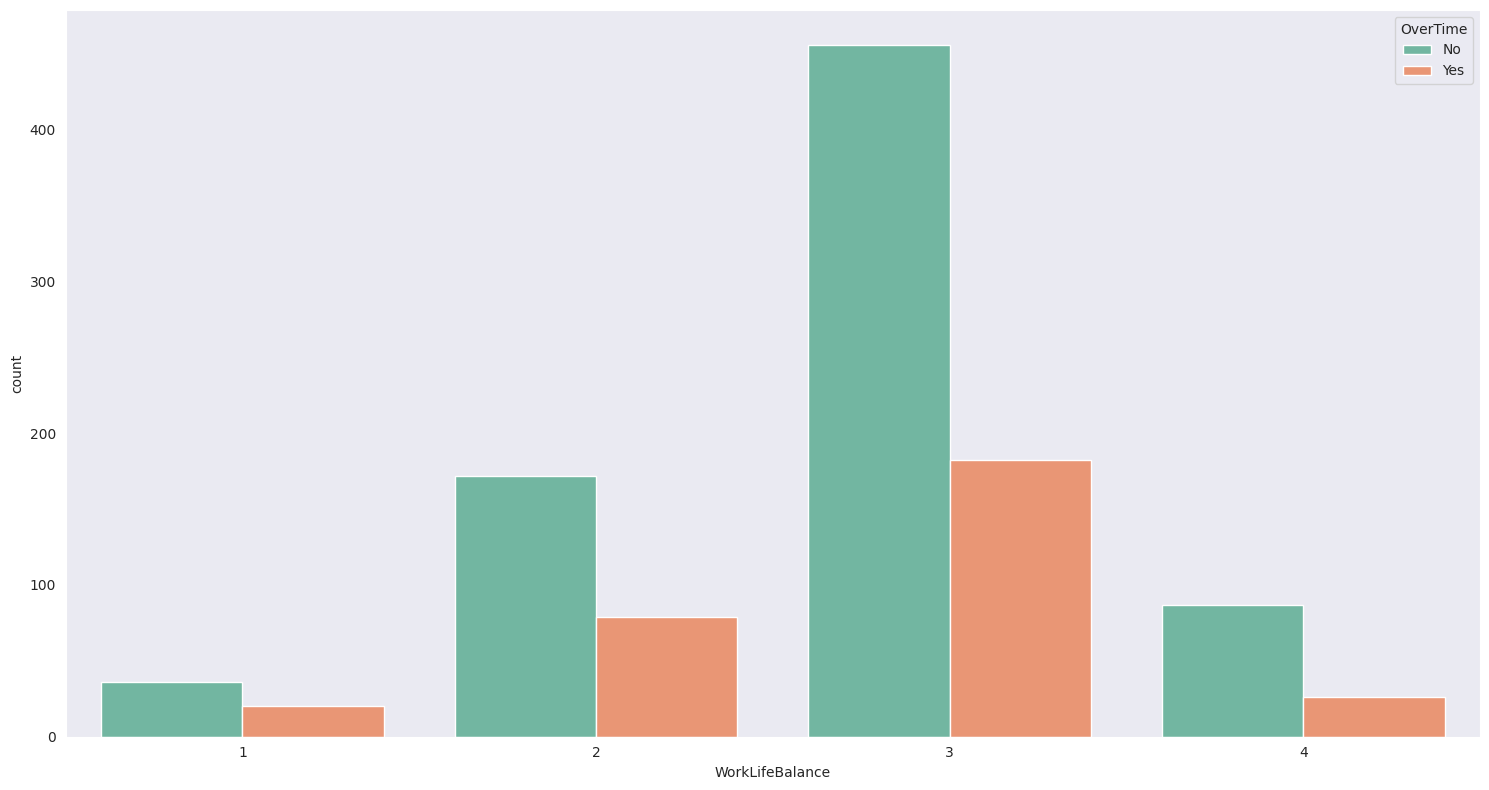

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, hue = 'OverTime', x = 'WorkLifeBalance',
              order=df.sort_values('WorkLifeBalance').WorkLifeBalance)

plt.tight_layout()
plt.show()

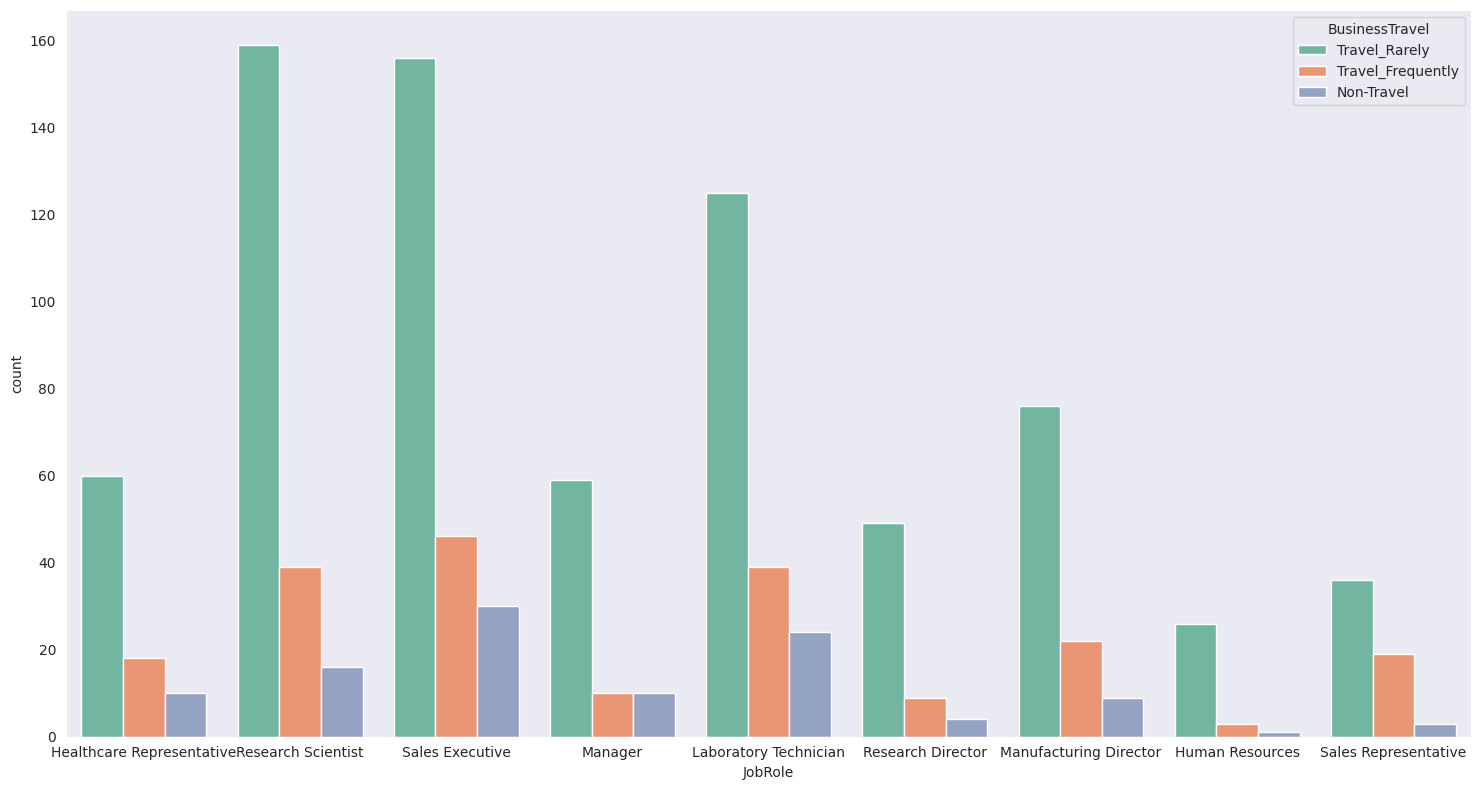

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'BusinessTravel')

plt.tight_layout()
plt.show()

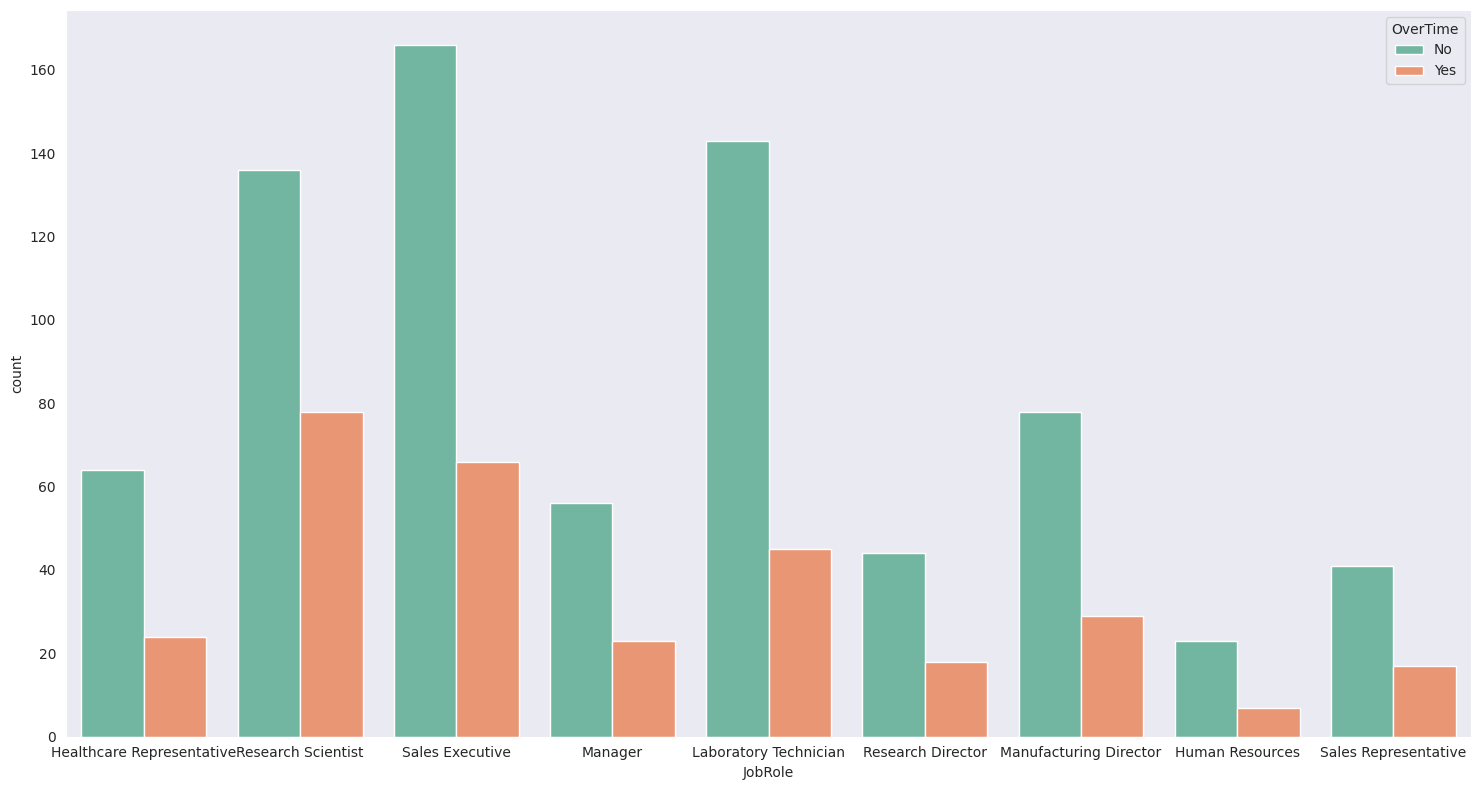

In [ ]:
plt.figure(figsize=(15, 8))

sns.countplot(data = df, x = 'JobRole', hue = 'OverTime')

plt.tight_layout()
plt.show()

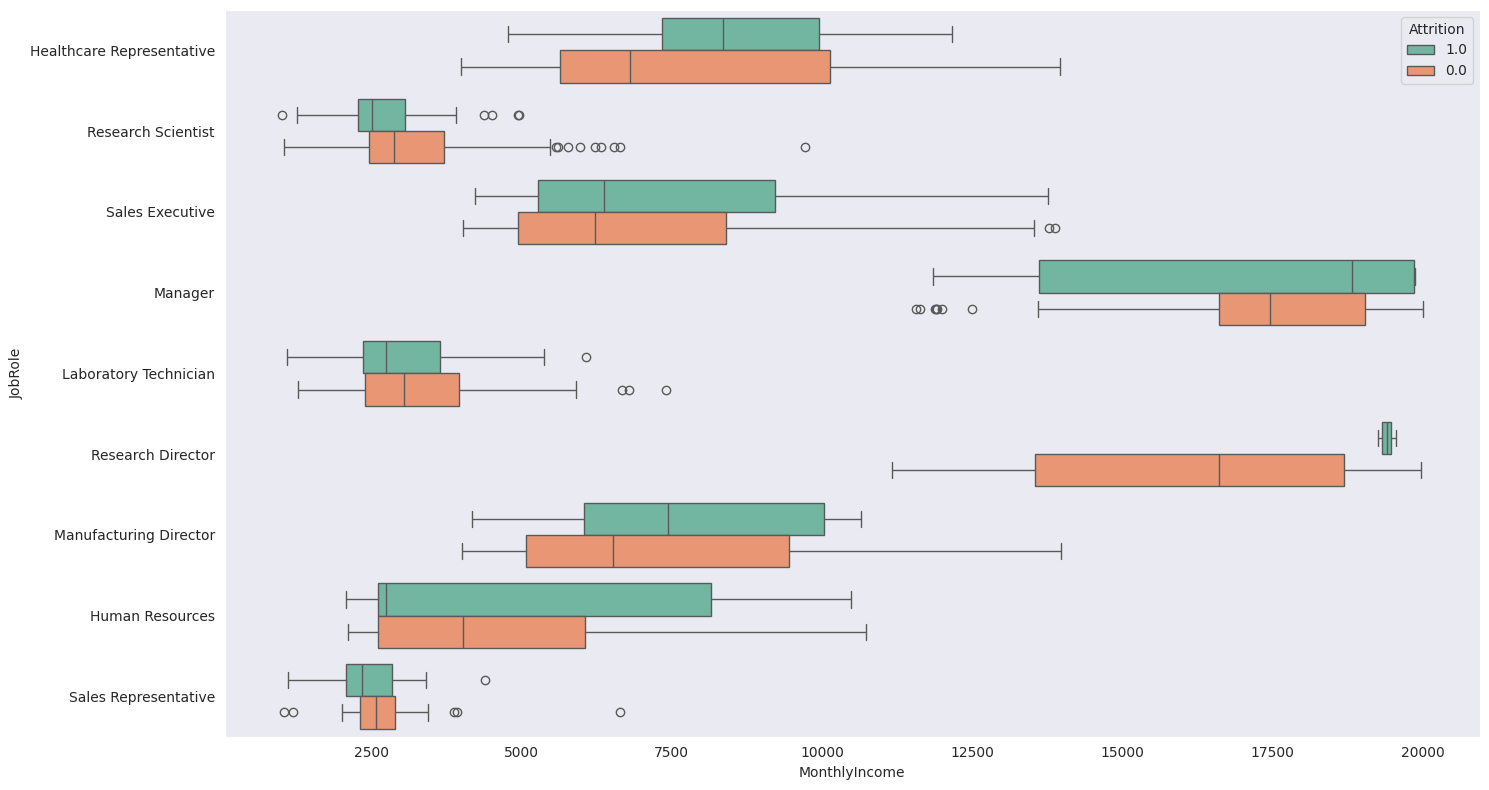

In [ ]:
plt.figure(figsize=(15, 8))

sns.boxplot(data = df, x = 'MonthlyIncome', y = 'JobRole', hue = 'Attrition')

plt.tight_layout()
plt.show()

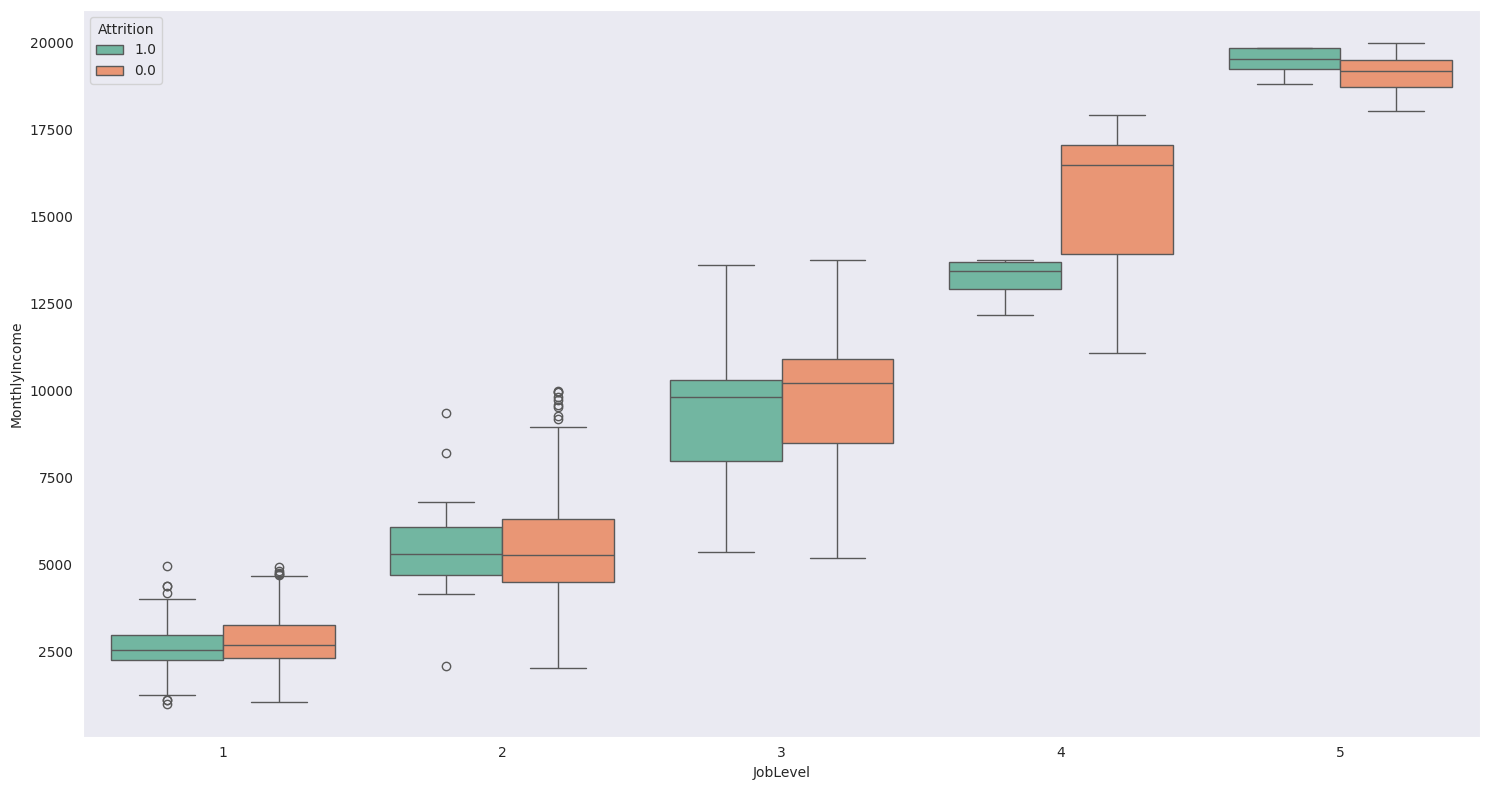

In [ ]:
plt.figure(figsize=(15, 8))

sns.boxplot(data = df, y = 'MonthlyIncome', x = 'JobLevel', hue = 'Attrition',
            order=df.sort_values('JobLevel').JobLevel)

plt.tight_layout()
plt.show()

From the graphs above, we can summarize a few things:


*   Most Job Roles have a pretty **similar satisfaction distribution**, with majority of employees satisfaction falls between category 3 or 4. **This also applies for Job Involvment** but mostly falls on category 3.
*   Most employees **Stock Option Level is in the level 0 or 1**, regardless of the Job Role.
*   Some **Job Role with a higher attrition rate** has a much lower Monthly Income compared to others such as **Sales Representative, Research Scientist, Laboratory Technician, and Human Resources.** This might be explained since most employees on that particular Job Role have a lower Job Level, hence lower income.







# **Summary**


*   The variables that affect high attrition rate are **satisfaction** (Environmental, Relationship, Job), **work life balance** and **overtime**, and **income** (Monthly Income and Stock Option Level).
*   Some Job Role have a higher attrition rate which are Sales Representative, Research Scientist, Laboratory Technician, and Human Resource, which mainly because of their **lower salary**.

# **Recommendation**


1.   To increase employees satisfaction, it is recommended **to conduct further interview** in order to better understand what affects the employees satisfactions, Since there are no clear pattern on what causes lower satisfaction from the data provided.
2.   Introduce **policies to improve work life balance** (Flexible Working Arragements, Flexible Time off, etc.)
3.  **Restructuring some Job Roles salaries** in order to improve their Monthly Income. This also can be done **by giving Stock Options**, since Higher Stock Option Level leads to lower attrition rate.



In [ ]:
prediction_df = df[['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
                     'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                     'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
                     'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',
                     'WorkLifeBalance'
                     ]]

prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   object
 2   BusinessTravel            1058 non-null   object
 3   DistanceFromHome          1058 non-null   int64 
 4   EnvironmentSatisfaction   1058 non-null   int64 
 5   JobInvolvement            1058 non-null   object
 6   JobLevel                  1058 non-null   object
 7   JobRole                   1058 non-null   object
 8   JobSatisfaction           1058 non-null   int64 
 9   MaritalStatus             1058 non-null   object
 10  MonthlyIncome             1058 non-null   int64 
 11  OverTime                  1058 non-null   object
 12  RelationshipSatisfaction  1058 non-null   int64 
 13  StockOptionLevel          1058 non-null   object
 14  WorkLifeBalance           105

In [ ]:
df.to_excel('/content/drive/MyDrive/Datasets/HR/HR-Analysis.xlsx')

In [ ]:
df.to_csv('/content/drive/MyDrive/Datasets/HR/file1.csv')